In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Ensemble Techniques...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Importing Warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Reading the csv file...
df=pd.read_csv('Customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Understanding the Data          

1) Features:               
   >>'customerID',              
   'gender',                   
   'SeniorCitizen',               
   'Partner',                 
   'Dependents',           
   'tenure',                
   'PhoneService',              
   'MultipleLines',                     
   'InternetService',            
   'OnlineSecurity',              
   'OnlineBackup',                    
   'DeviceProtection',                 
   'TechSupport',              
   'StreamingTV',                 
   'StreamingMovies',               
   'Contract',                   
   'PaperlessBilling',                
   'PaymentMethod',             
   'MonthlyCharges',                                    
   'TotalCharges',                     

2) Target:        
   >> 'Churn'                       

3) we need to predict customer churn before they decide to leave.

4) The data in our target feature is categorical, thus i will use classification models.


In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 7043 rows and 21 columns.
df.shape

(7043, 21)

In [4]:
# Checking the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Dropping duplicates if any...
df.drop_duplicates()
# No duplicates entries found

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Features Information:                   
1) No null data.              
2) float datatype= 1                
3) int datatype= 2                
4) object datatype= 18              

In [8]:
# Statistical Features Information......
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Checking the null values....
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in customerID are 7043 
Number of unique values in gender are 2 
Number of unique values in SeniorCitizen are 2 
Number of unique values in Partner are 2 
Number of unique values in Dependents are 2 
Number of unique values in tenure are 73 
Number of unique values in PhoneService are 2 
Number of unique values in MultipleLines are 3 
Number of unique values in InternetService are 3 
Number of unique values in OnlineSecurity are 3 
Number of unique values in OnlineBackup are 3 
Number of unique values in DeviceProtection are 3 
Number of unique values in TechSupport are 3 
Number of unique values in StreamingTV are 3 
Number of unique values in StreamingMovies are 3 
Number of unique values in Contract are 3 
Number of unique values in PaperlessBilling are 2 
Number of unique values in PaymentMethod are 4 
Number of unique values in MonthlyCharges are 1585 
Number of unique values in TotalCharges are 6531 
Number of unique values in Churn are 2 


In [11]:
# Checking the correlation
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


# Univariant Analysis

SeniorCitizen        AxesSubplot(0.125,0.657941;0.168478x0.222059)
tenure            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
MonthlyCharges    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
dtype: object

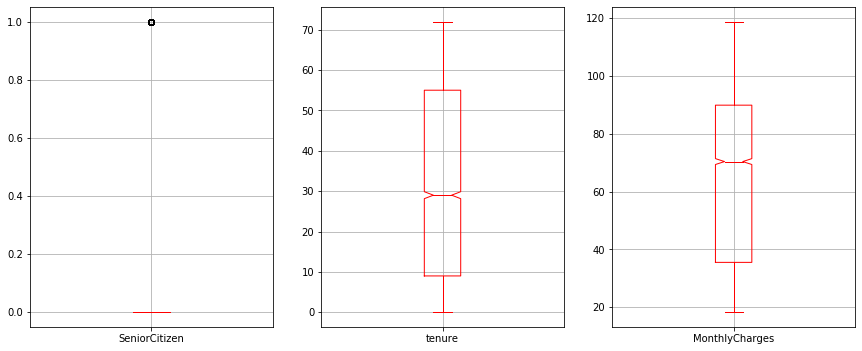

In [12]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,4),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002685A34CE48>,
      dtype=object)

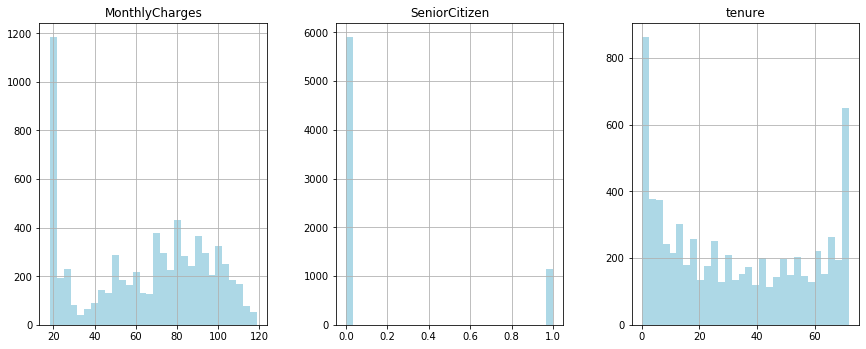

In [13]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(3,4),bins=30,color='lightblue') 

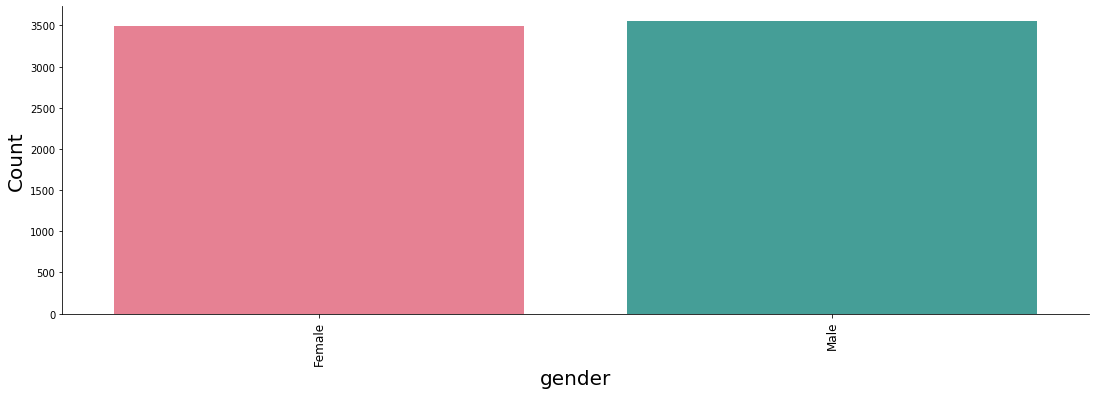

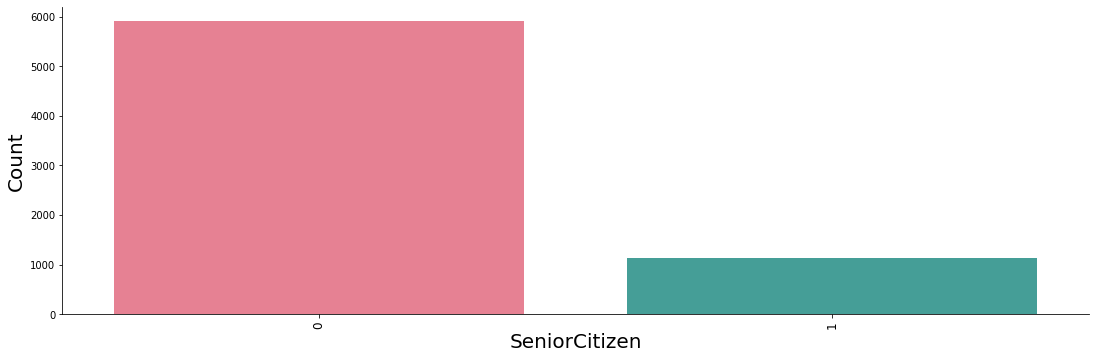

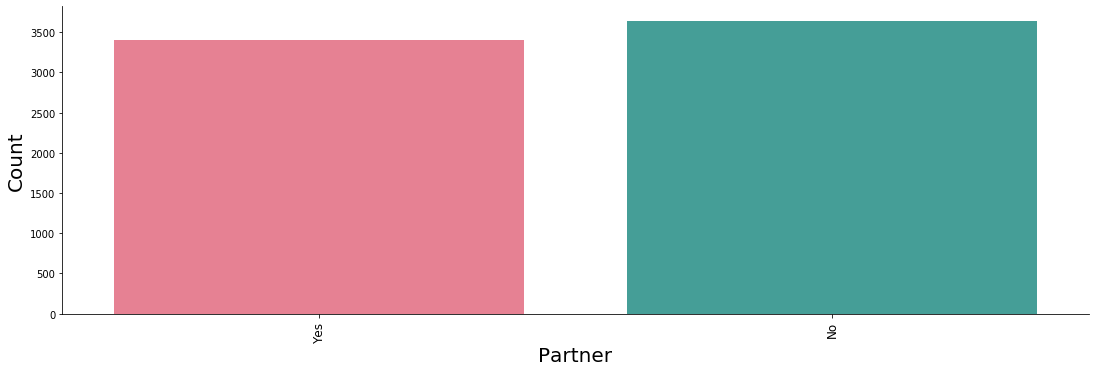

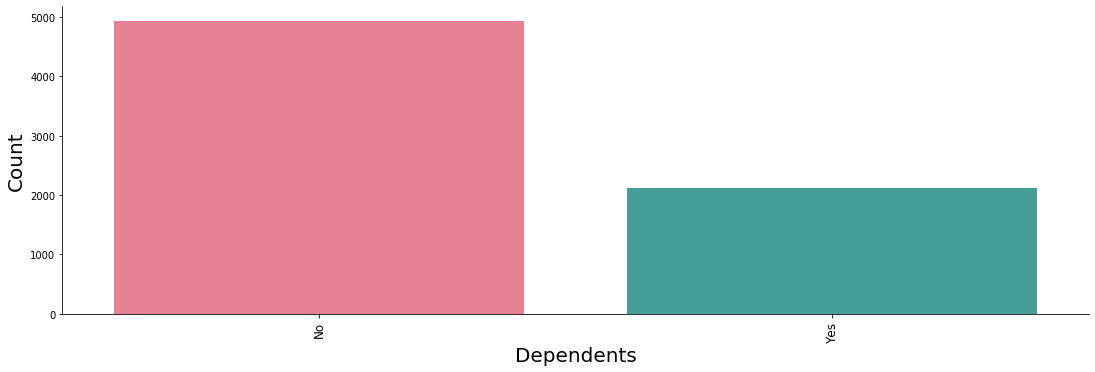

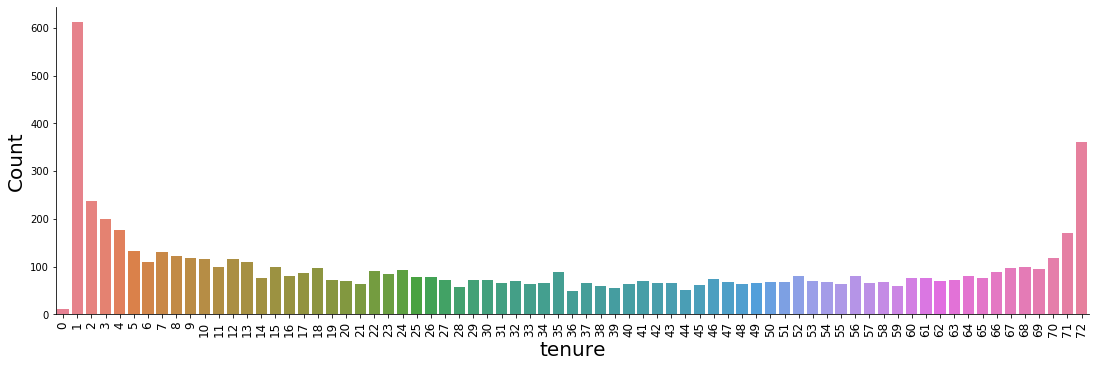

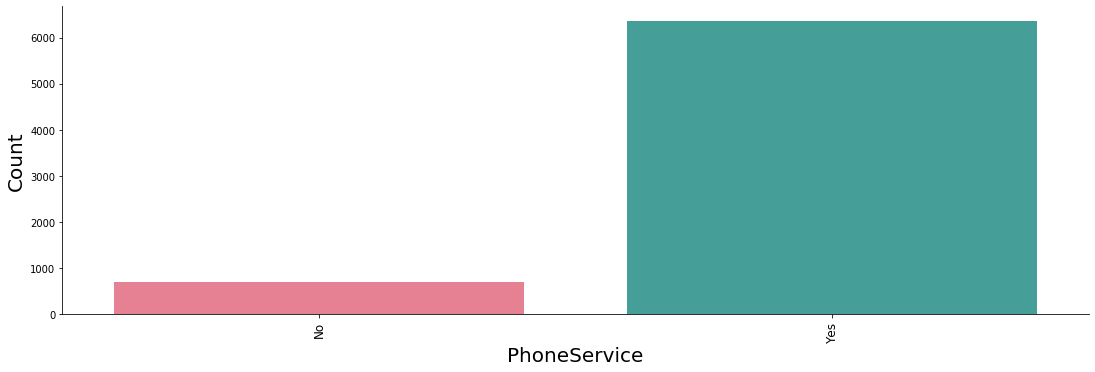

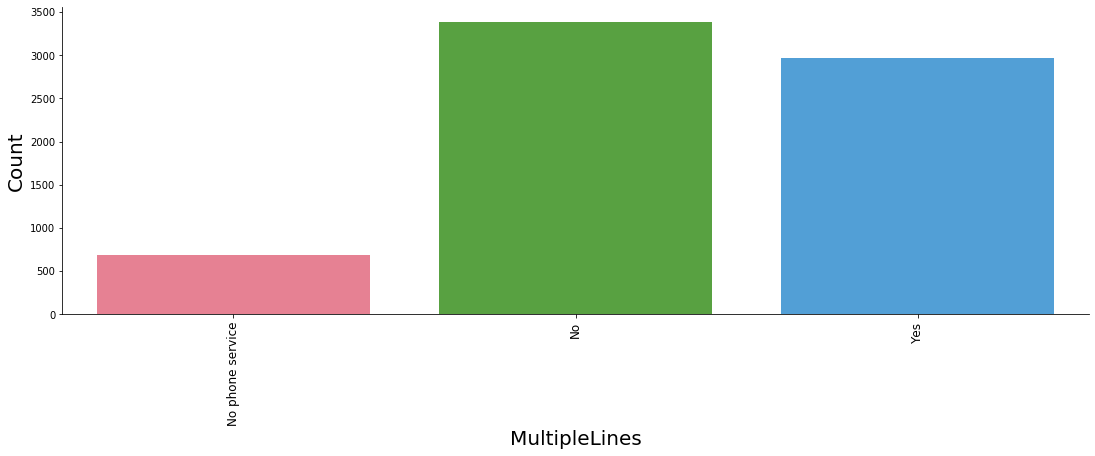

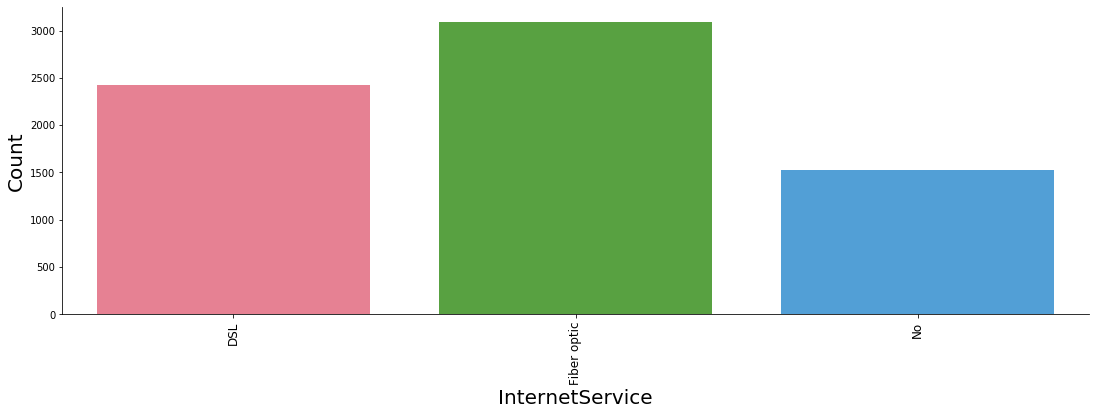

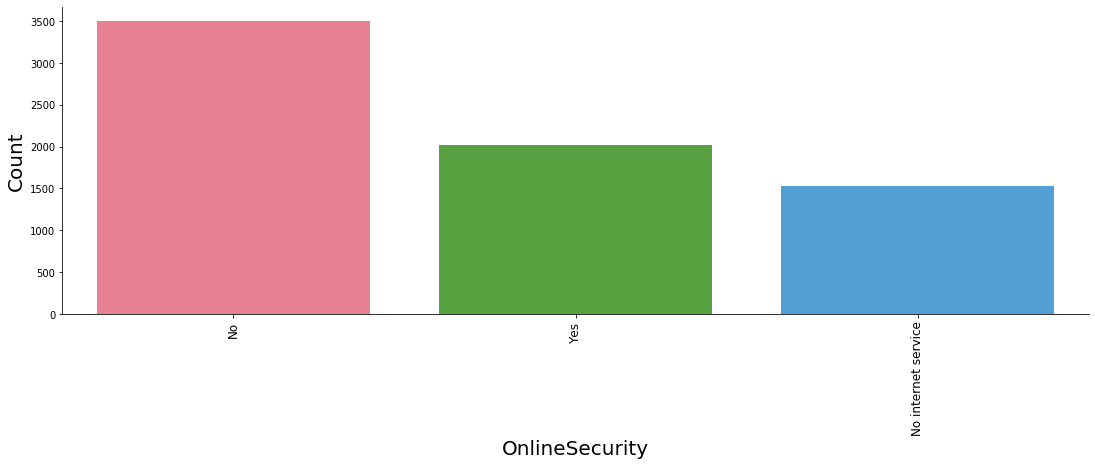

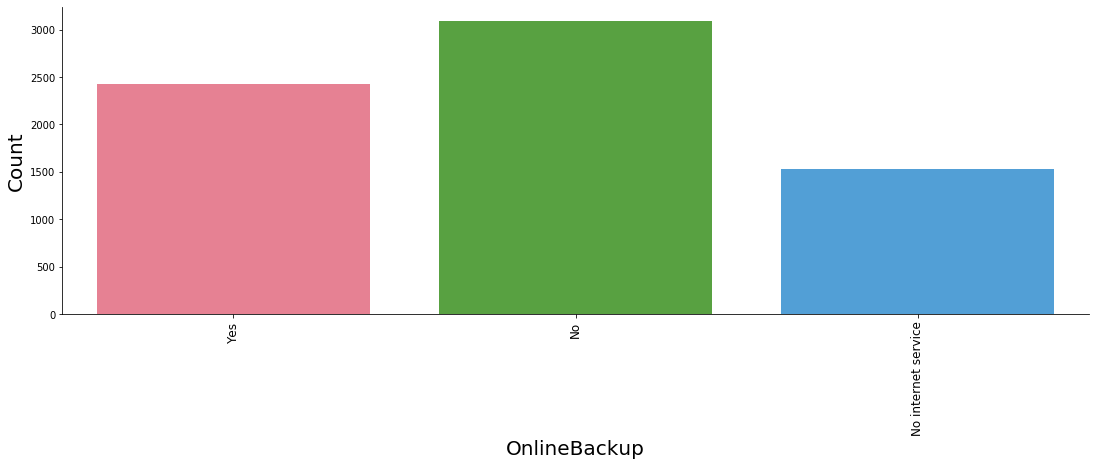

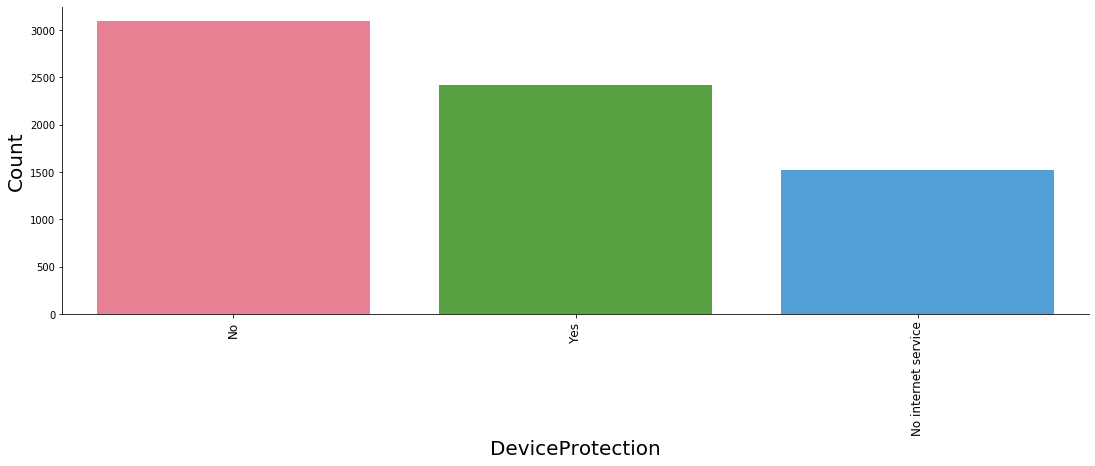

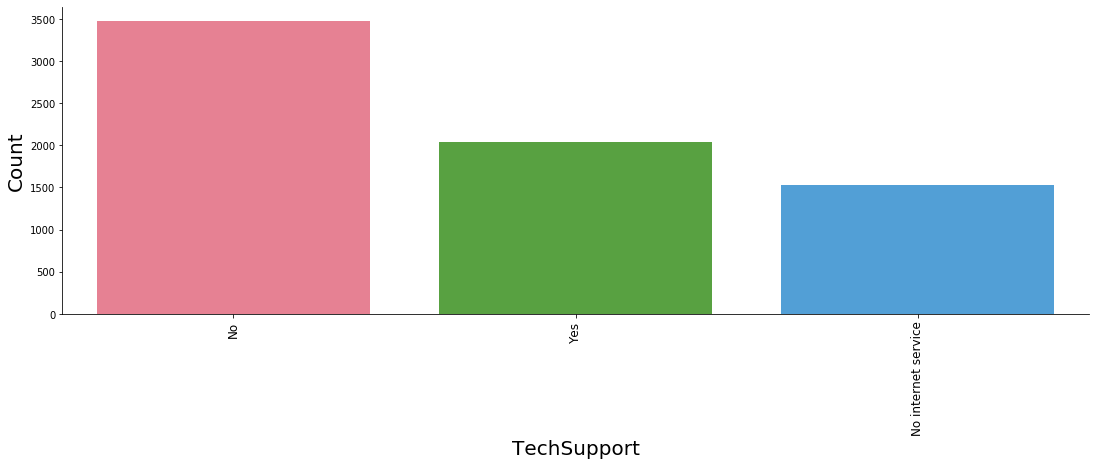

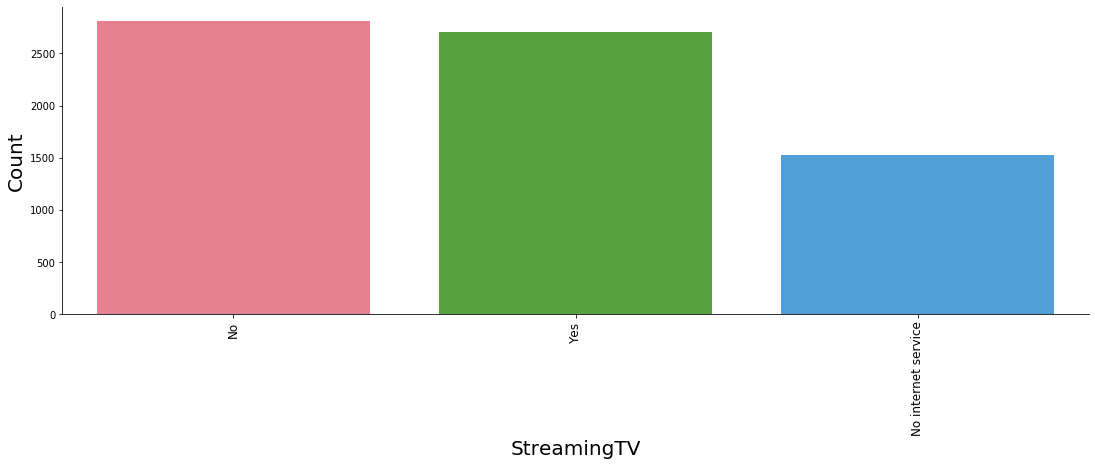

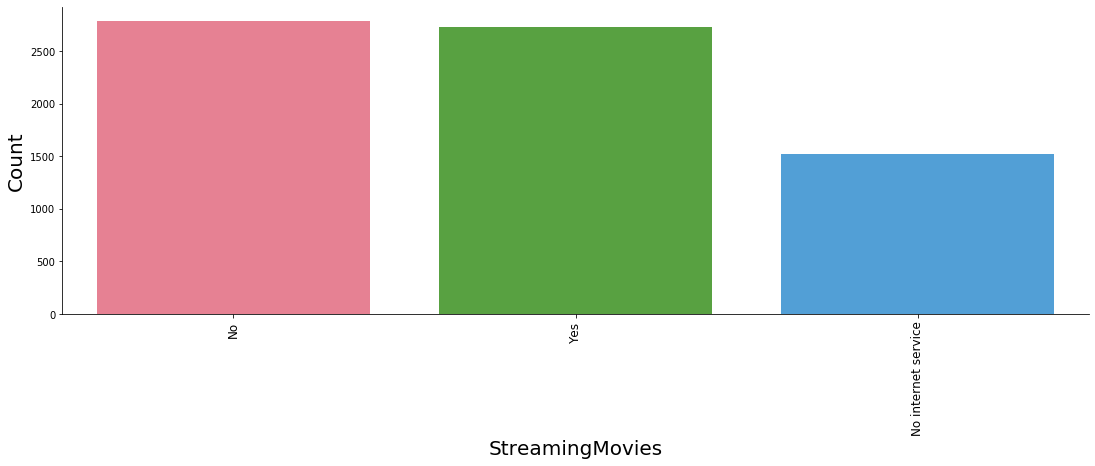

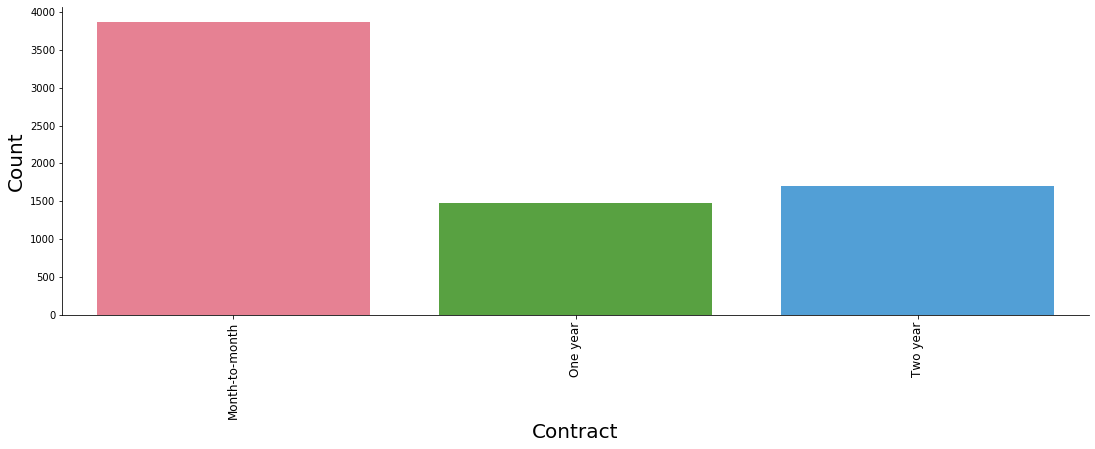

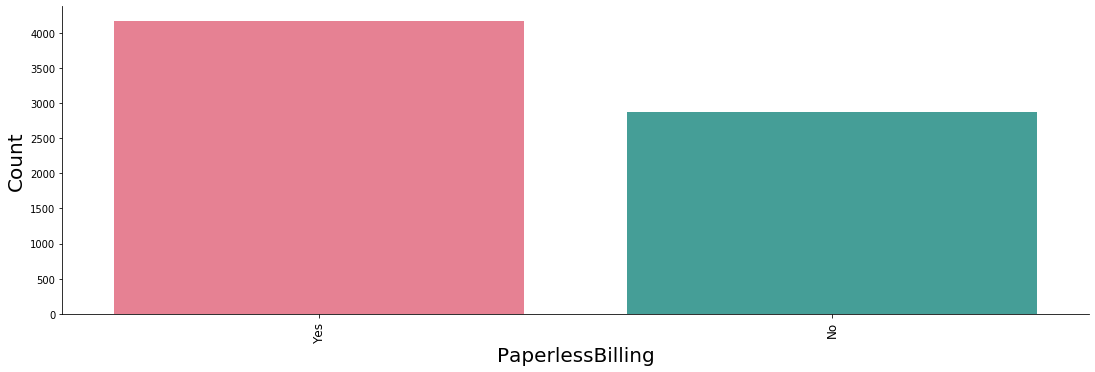

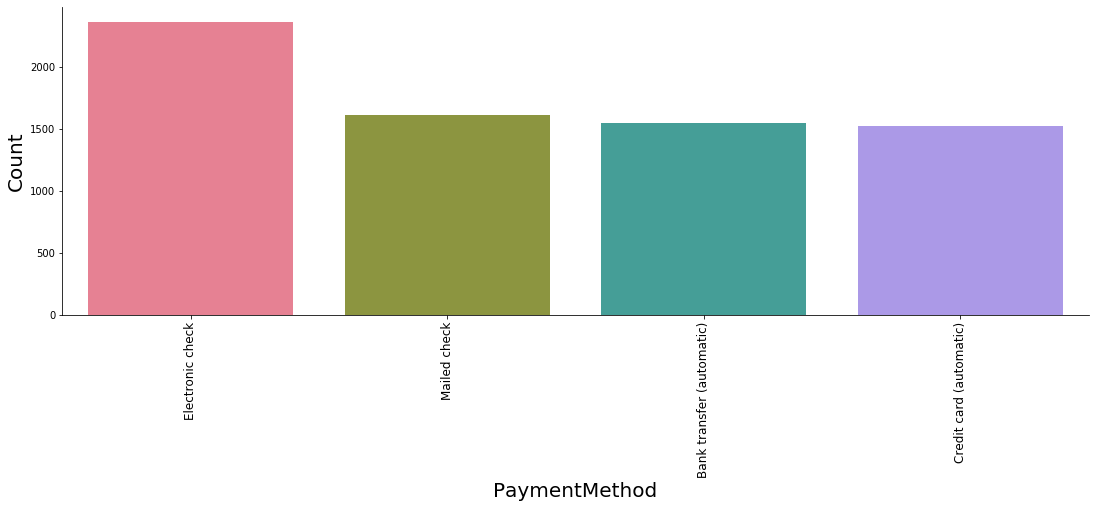

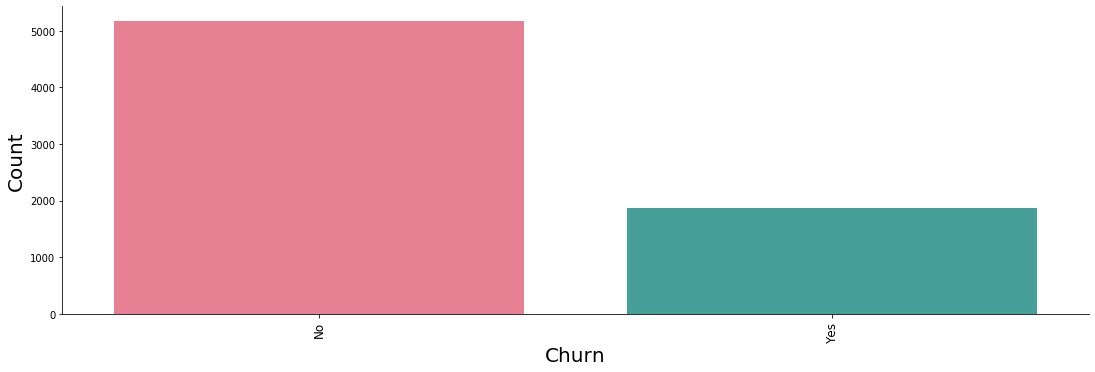

In [14]:
# For loop to plot the graphs of different features with respect to the number of count of each unique instance...
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl',
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:                           

1) Number of customers who are parteners are less.                 
2) Males and Females customers are almost equal.               
3) Senior Citizen Customers are less as compared to the young ones.              
4) Customers who don't have dependents are more in number.           
5) As Tenure increases number of Customers also decreases            
6) Customers who uses phone services are more.                         
7) Customers who uses Fiber optic internet service are more.                        
8) Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup are more.  
9) Customers whose Contract are month to month are more in number than those who have contract yearly and more than that.   
10) Customers who prefer Paperless billing are more in number.                               
11) Customers who use Electronic Check are more in number.                         
12) Customers who won't leave are more in number.                  

# Bivariant analyssis

In [15]:
# In the Total Charges most values are numeric, So here i am converting Total Charges into numeric datatype for further analysis.......
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [16]:
# Separate categorical and numerical Features.......
obj_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

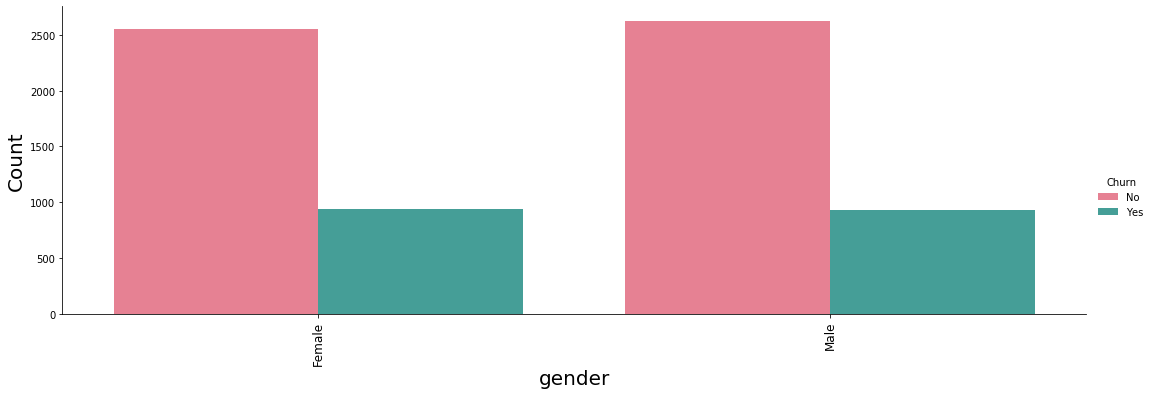

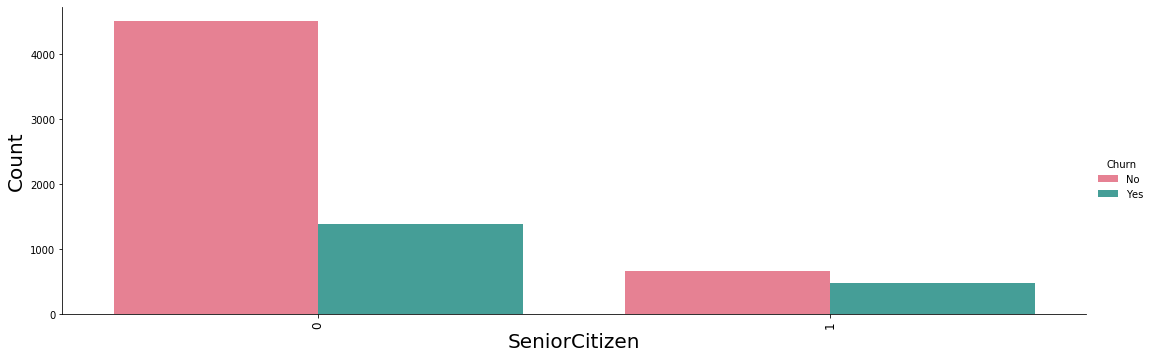

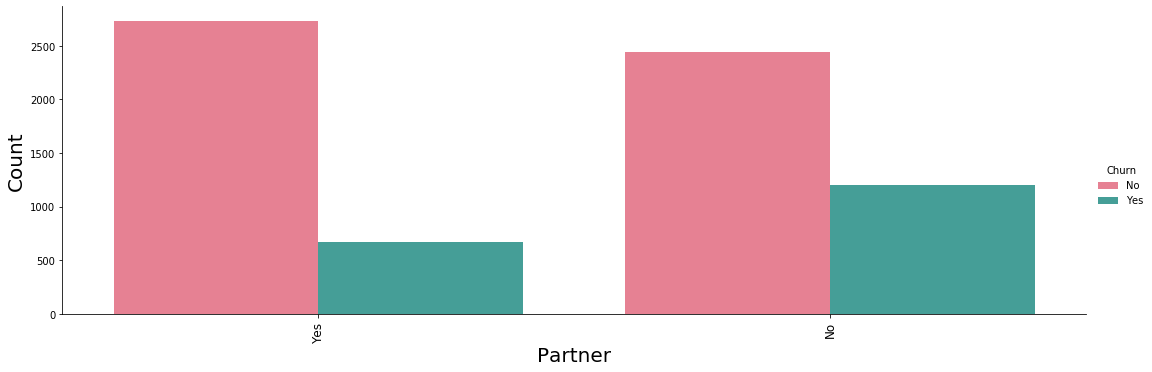

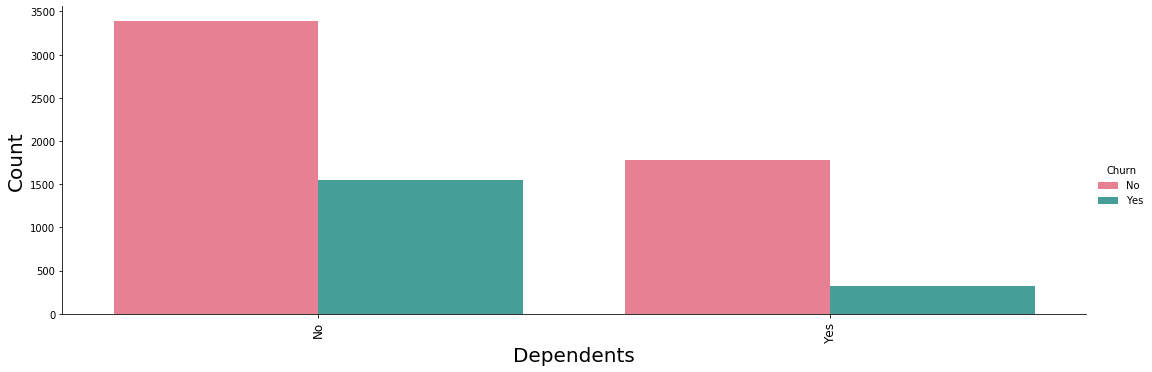

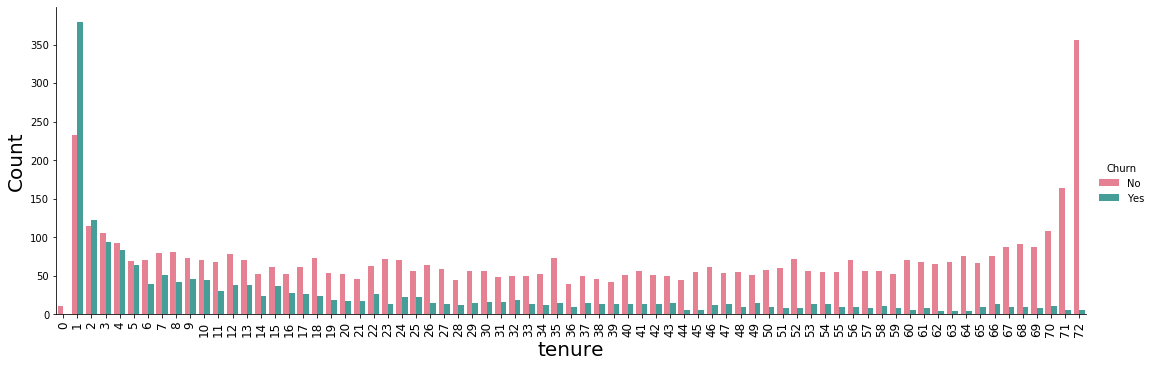

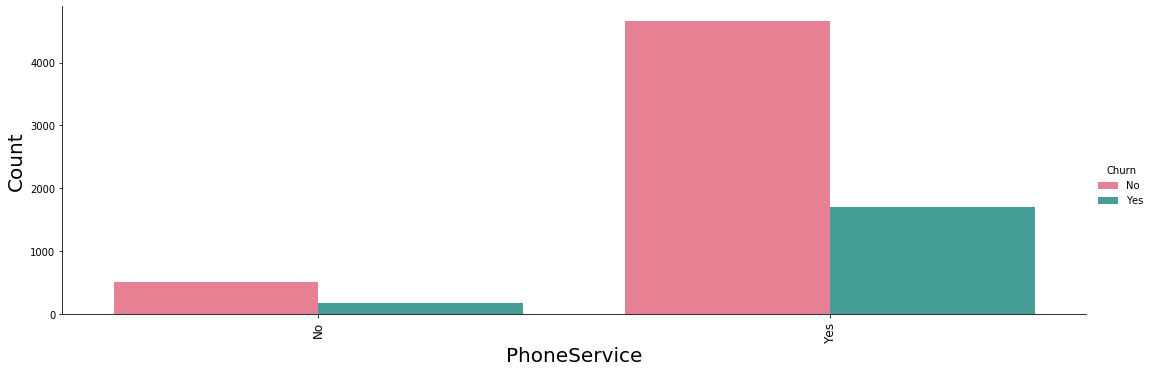

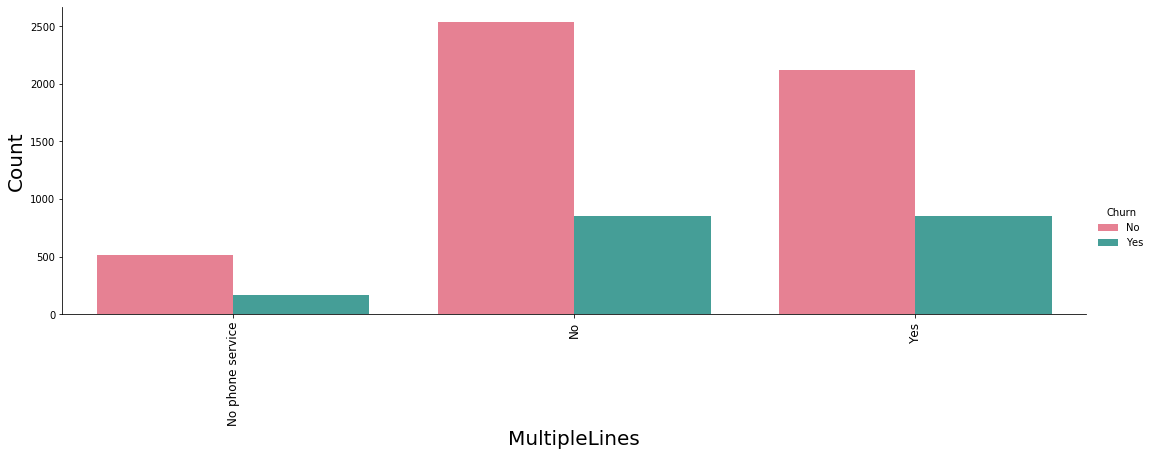

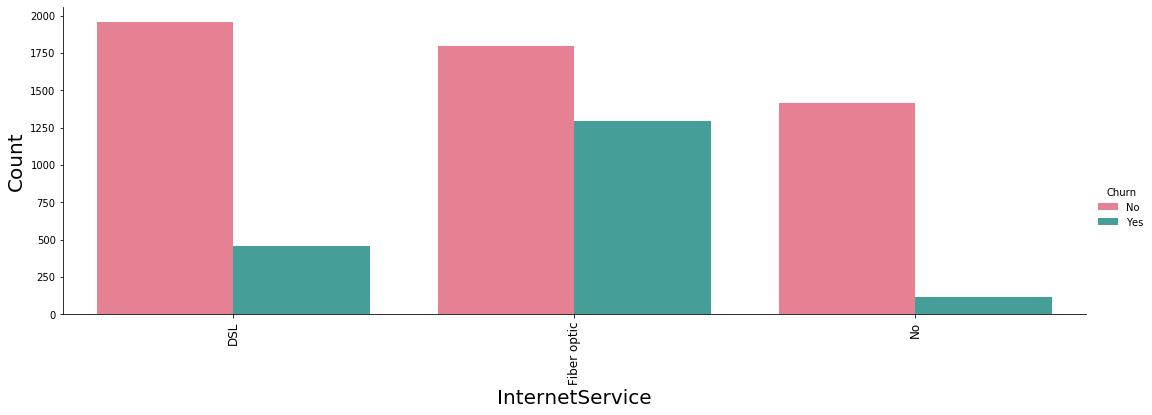

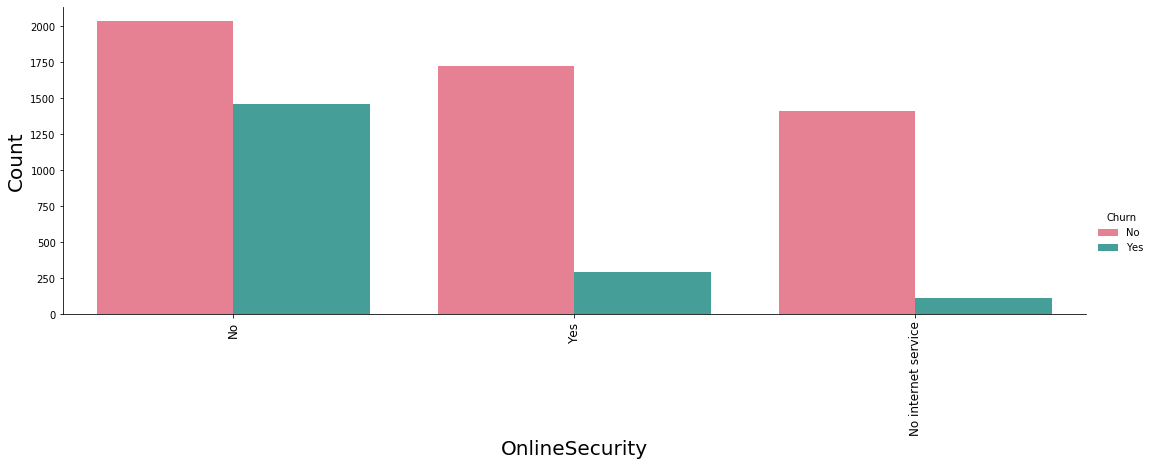

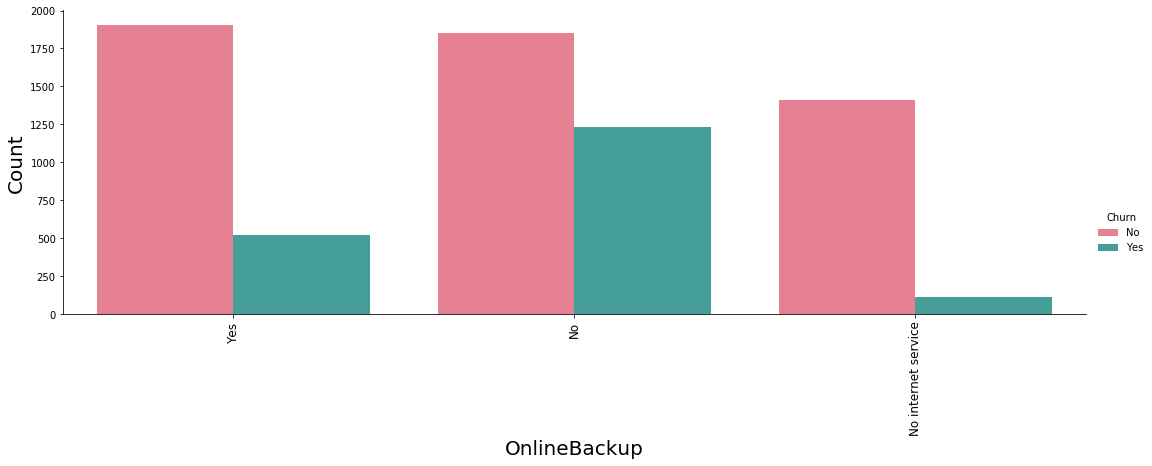

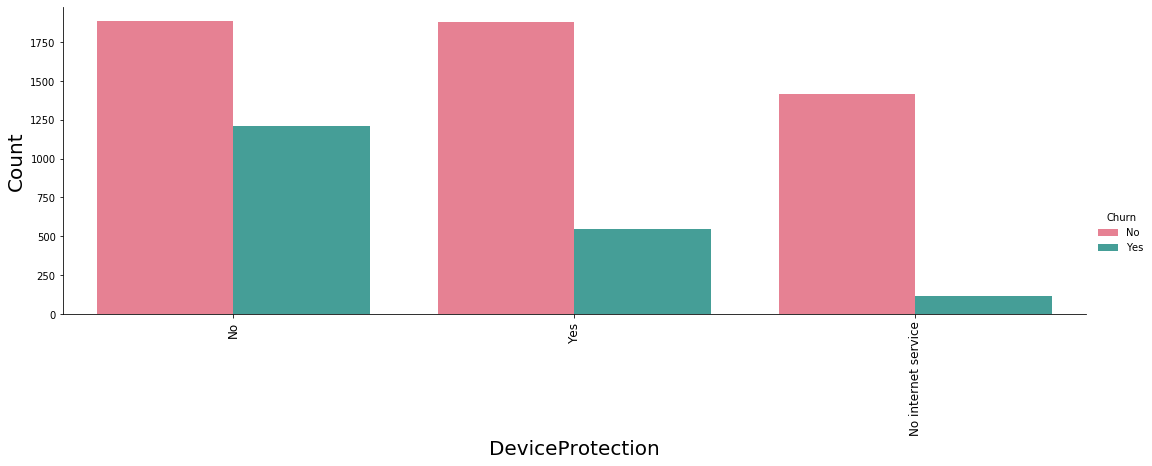

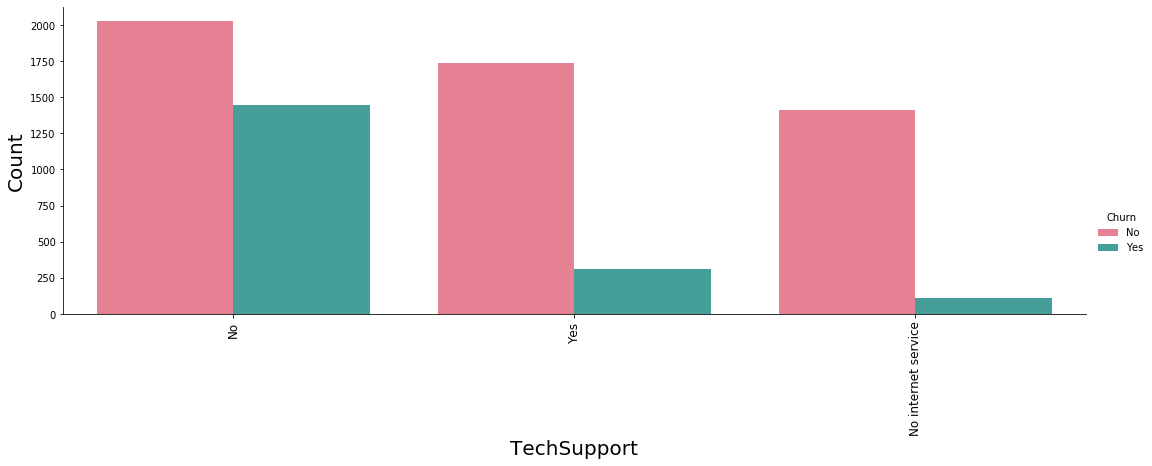

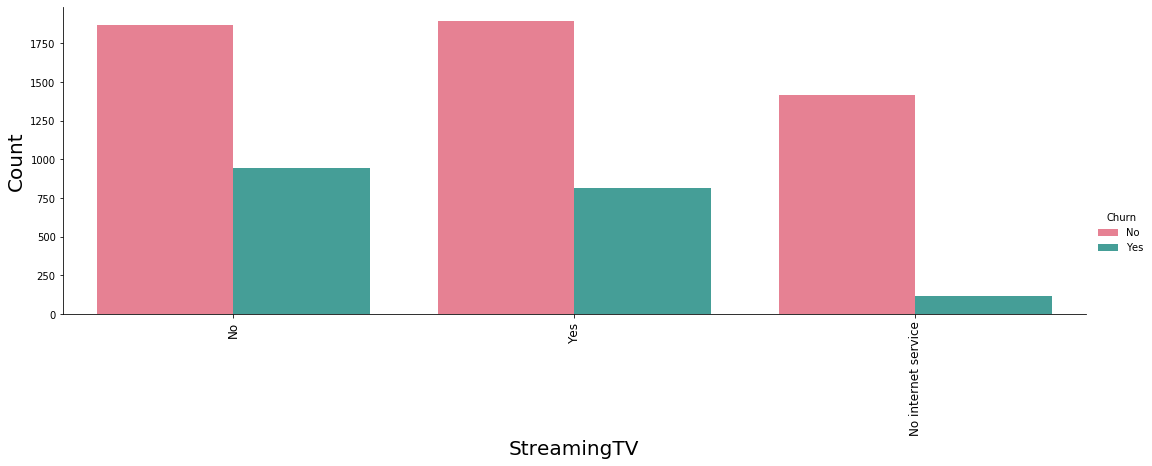

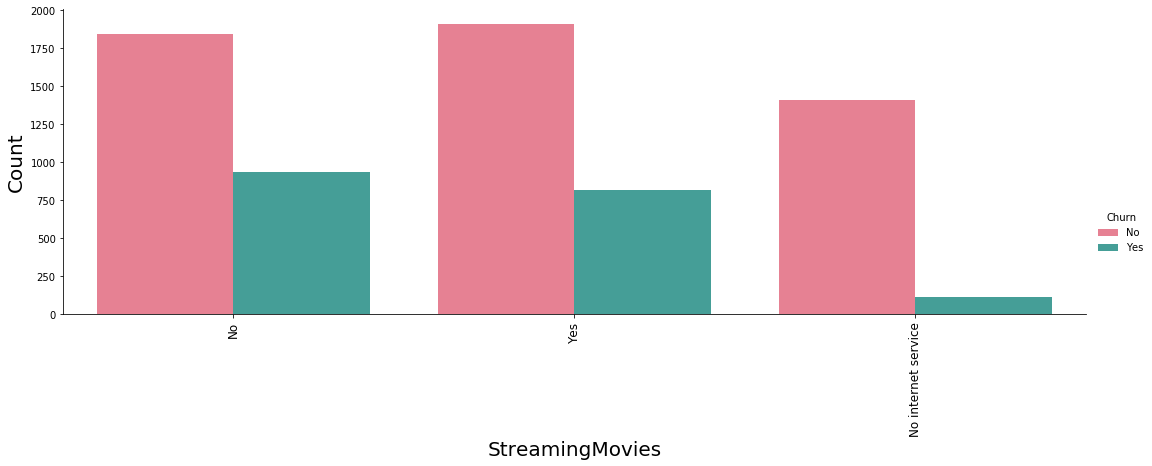

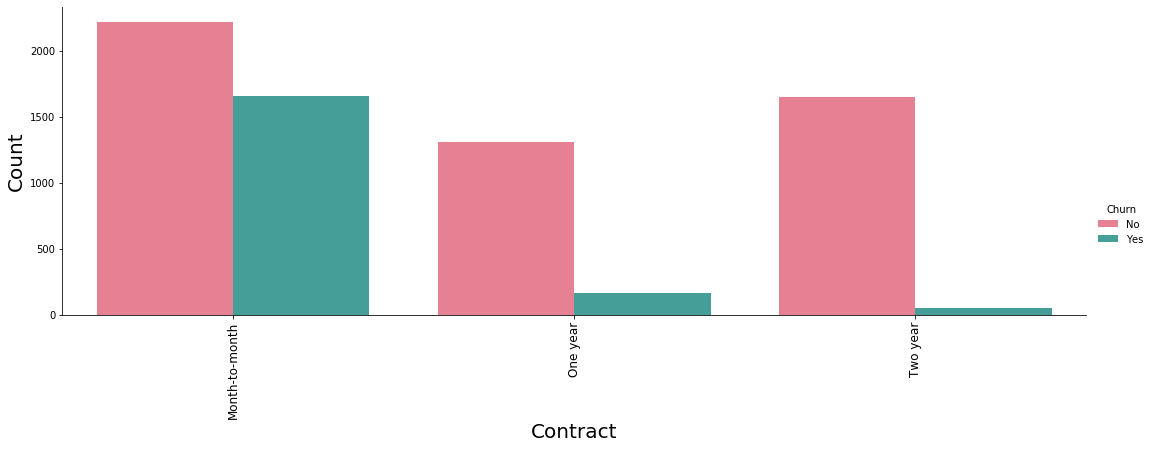

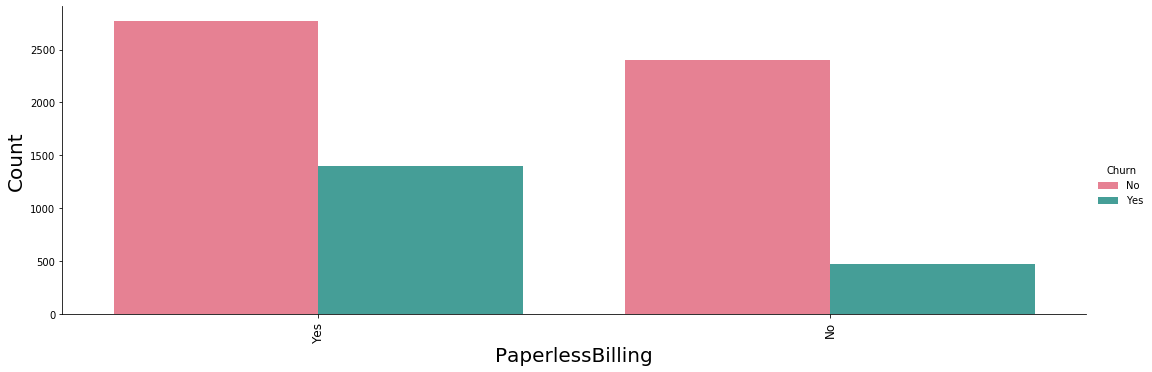

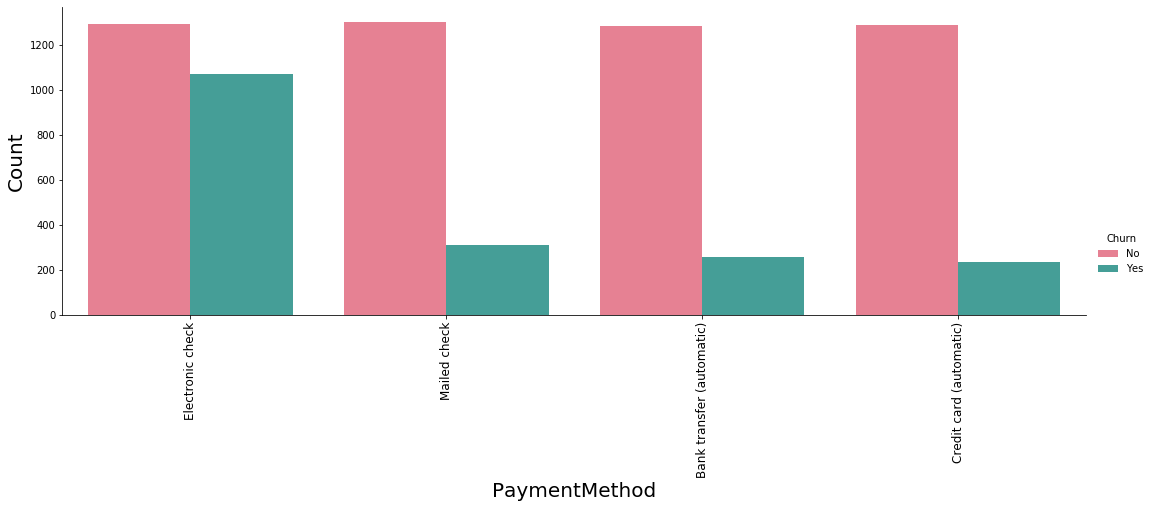

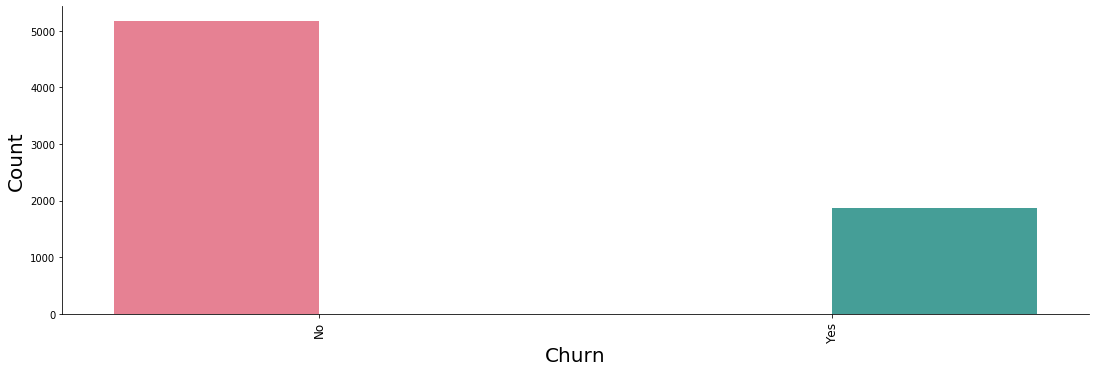

In [17]:
# for loop to plot the graphs between different features counts with respect to the churn..... 
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl',
                hue='Churn'
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:                                      

1) Number of customers who are parteners are less.                  
2) Males and Females customers are almost equal.                                
3) Proportion of churn in Senior Citizen Customers are more as compared to the young ones.                    
4) Proportion of churn in customers who aren't parteners is more.                     
5) Customers who don't have dependents are more in number and have more proportion of churn.                
6) As Tenure increases number of Customers with churn also decreases                  
7) Customers who uses phone services have more proportion of churn.                    
8) Customers who uses Fiber optic internet service have more proportion of churn.                
9) Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup have more proportion of churn.                              
10) Customers whose Contract are month to month are more in number and have more proportion of churn.                 
11) Customers who prefer Paperless billing are more in number and have more churn.            
12) Customers who use Electronic Check are more in number and have more churn proportion.                  
13) Customers who won't leave are more in number.                     

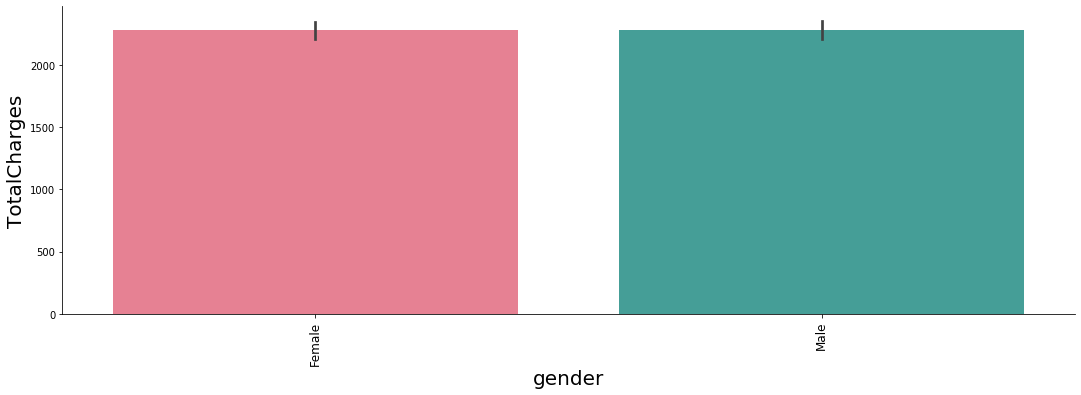

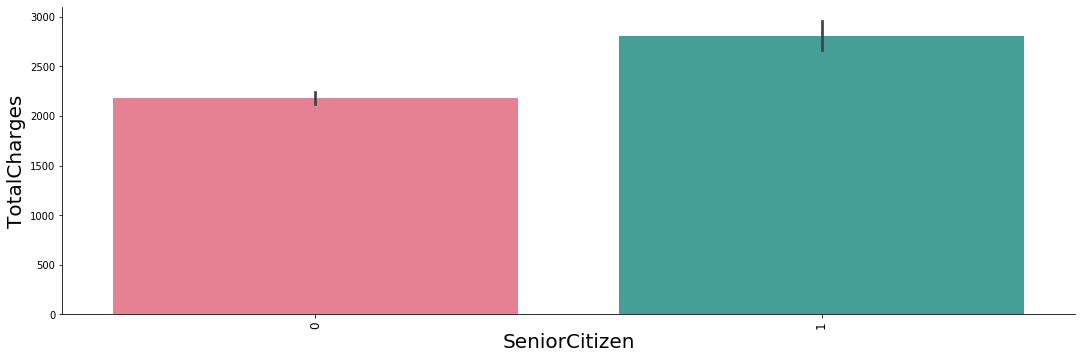

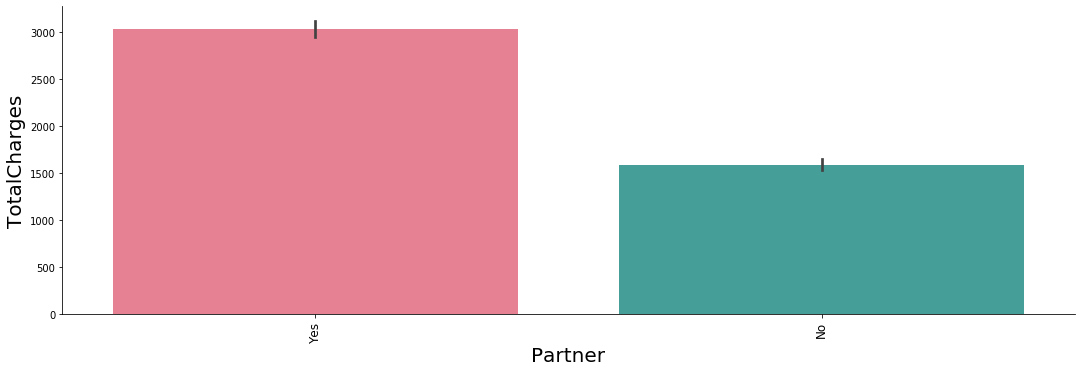

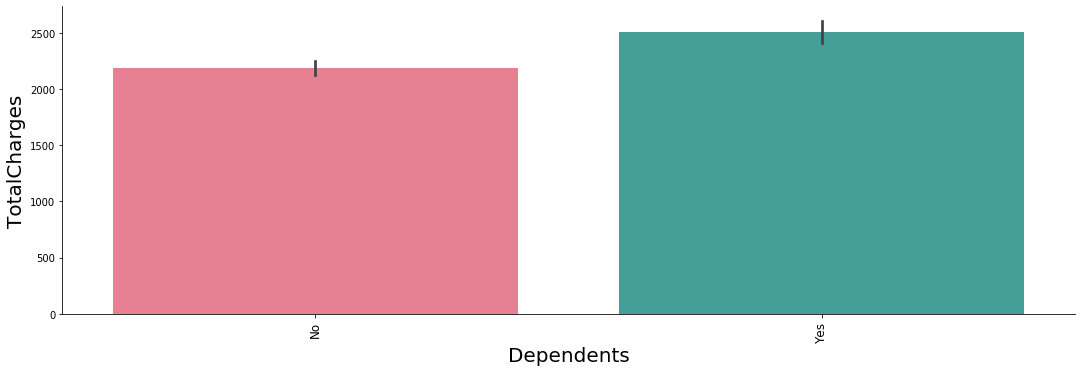

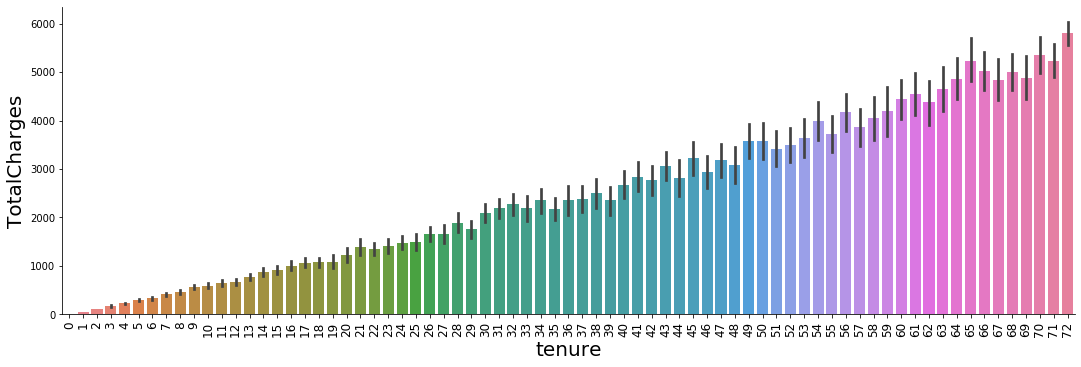

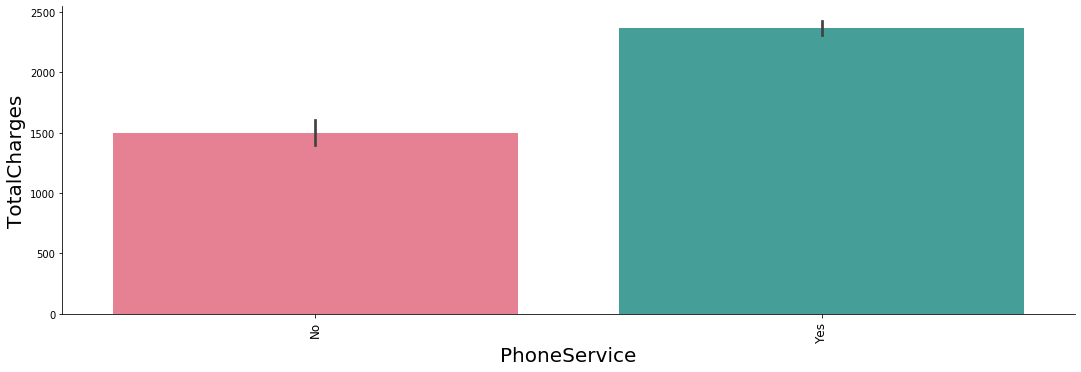

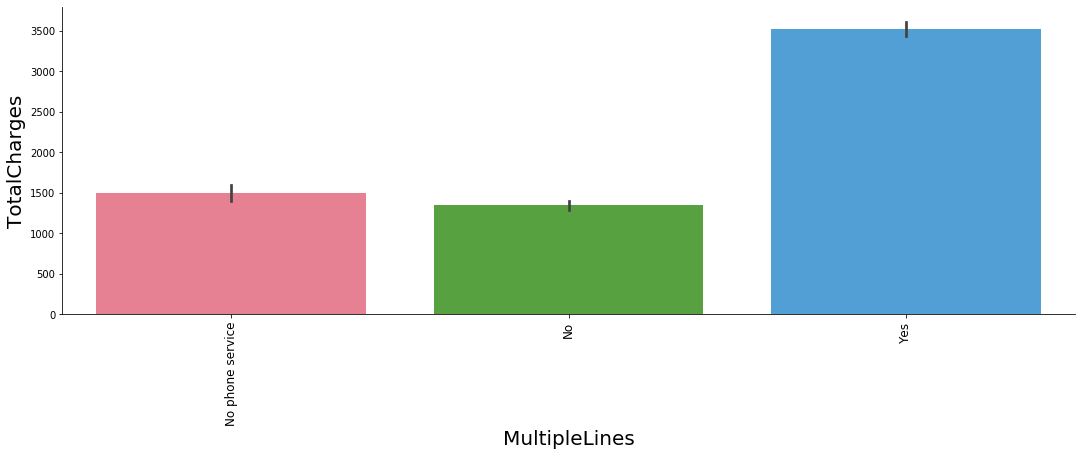

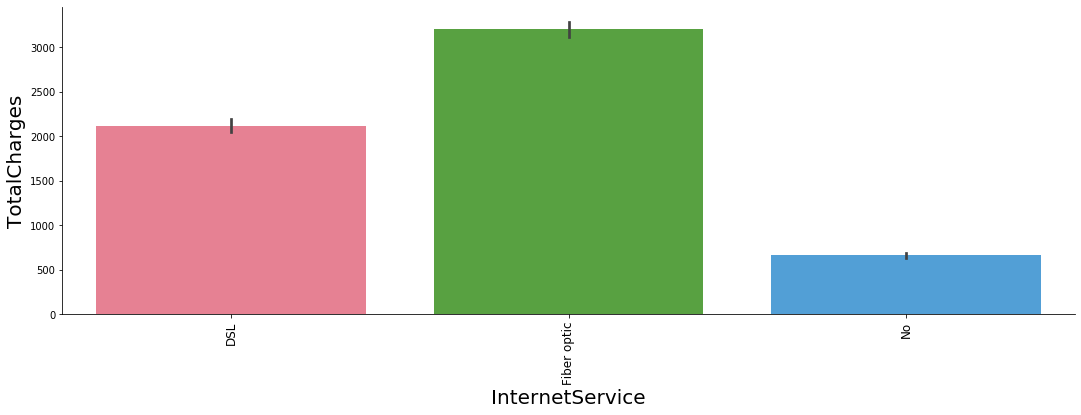

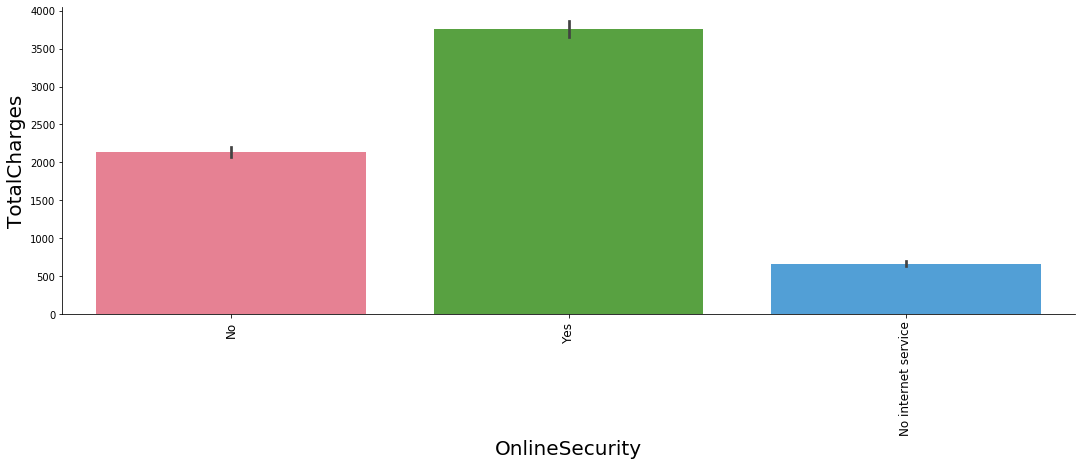

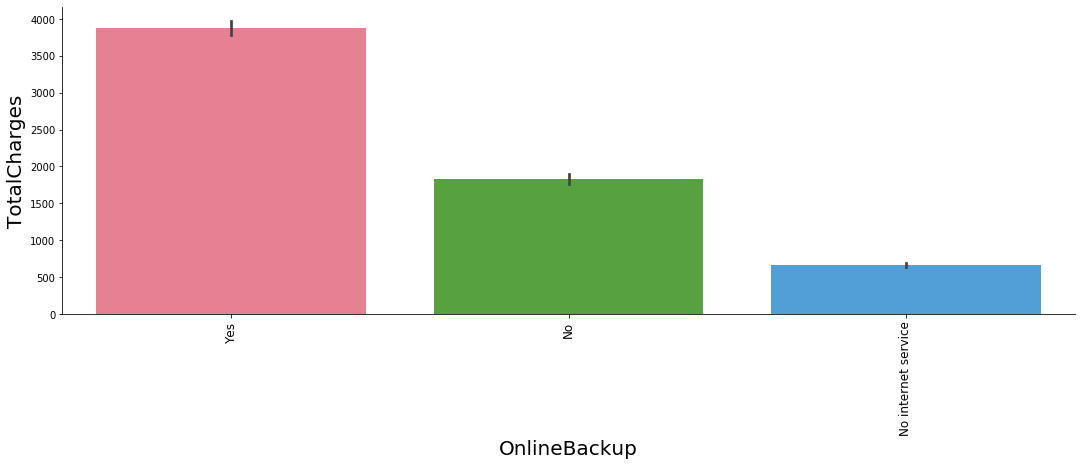

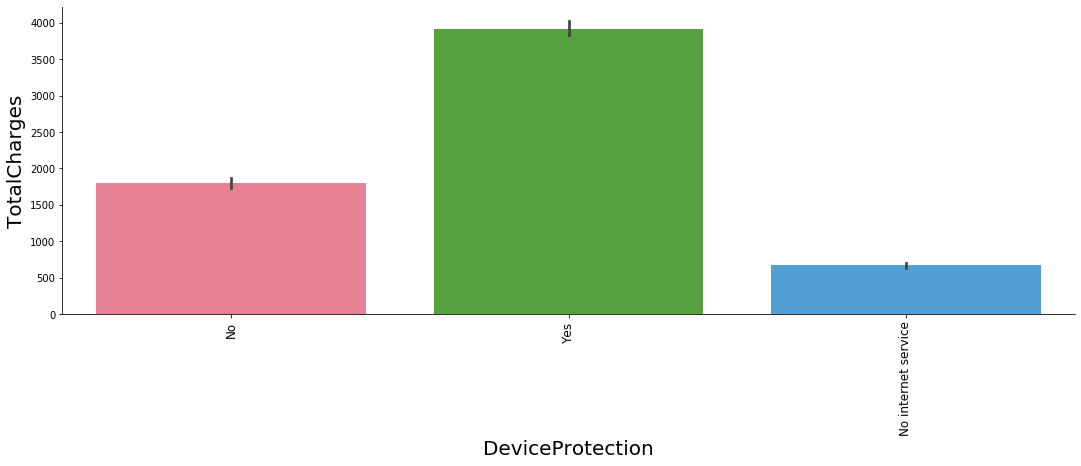

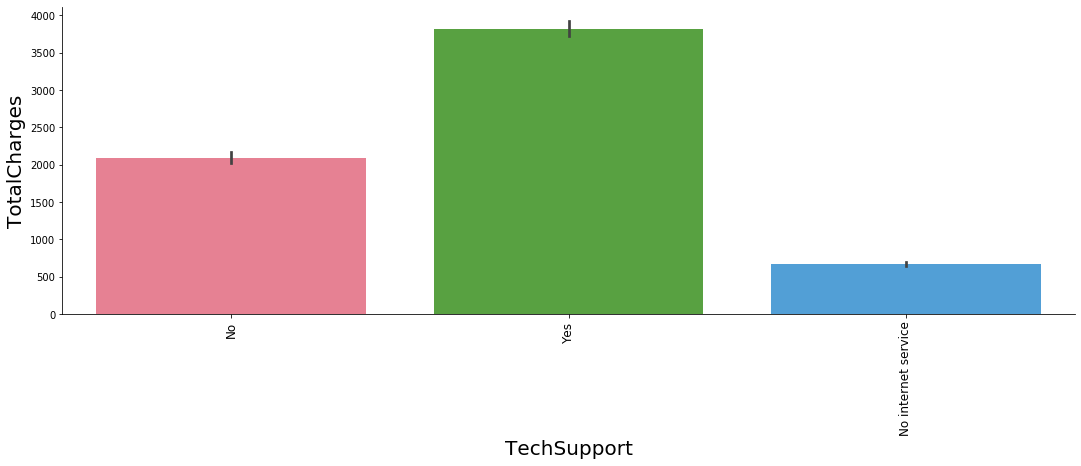

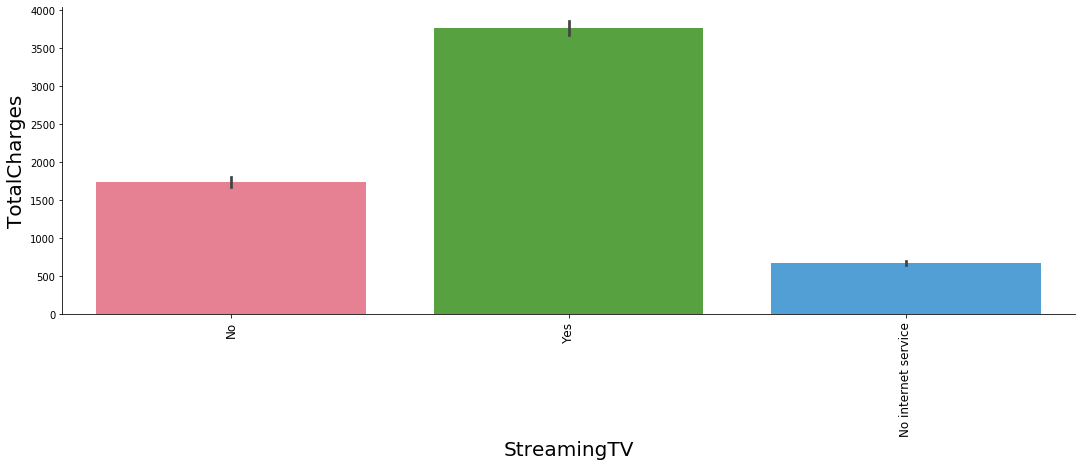

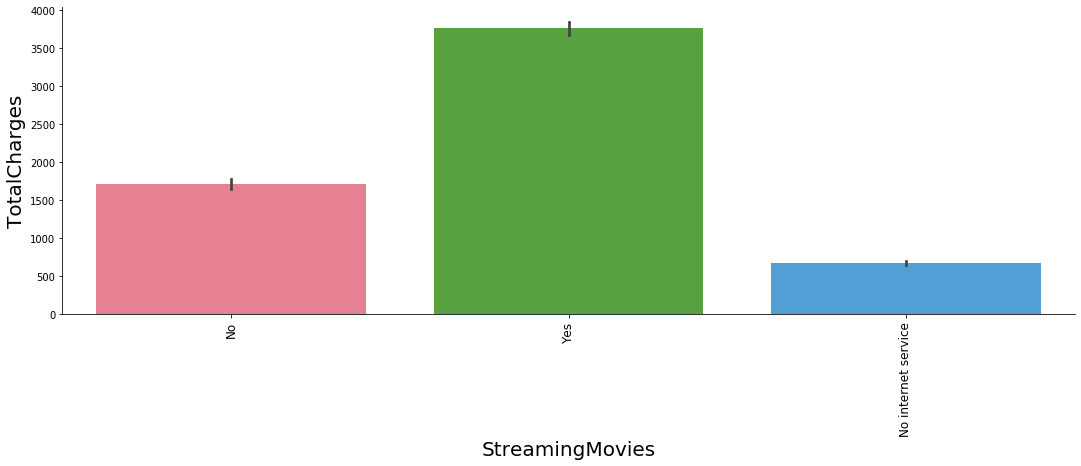

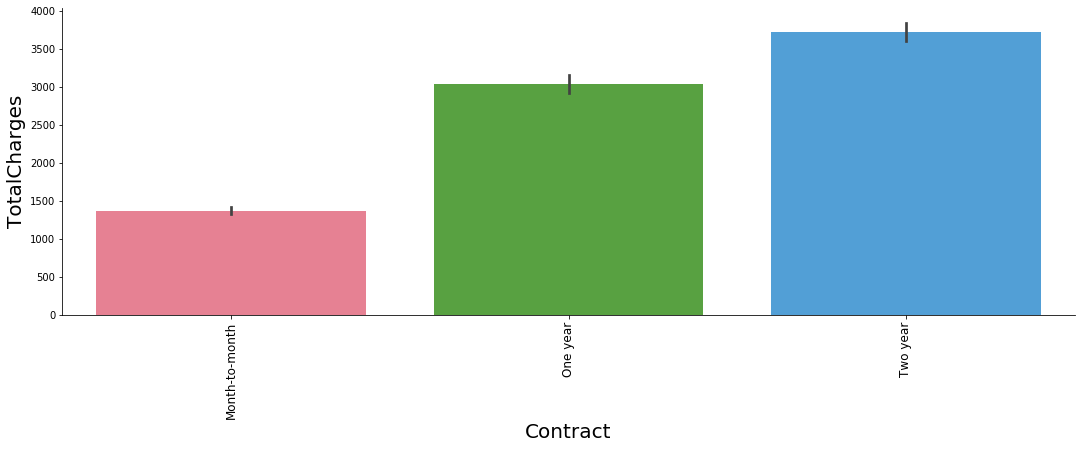

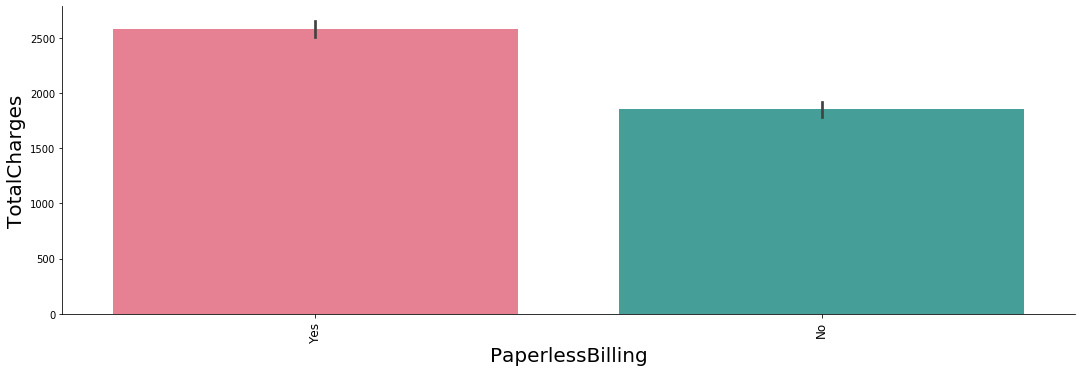

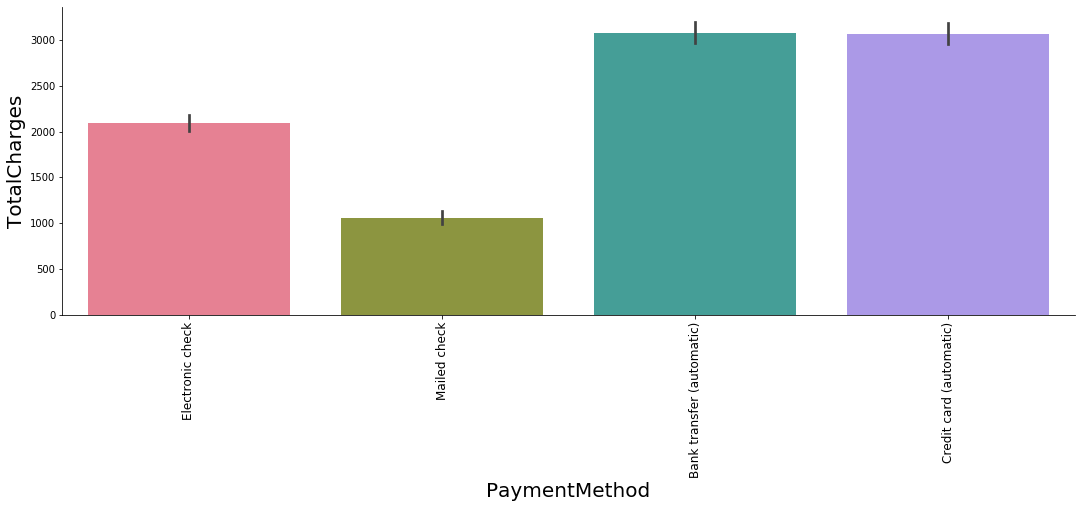

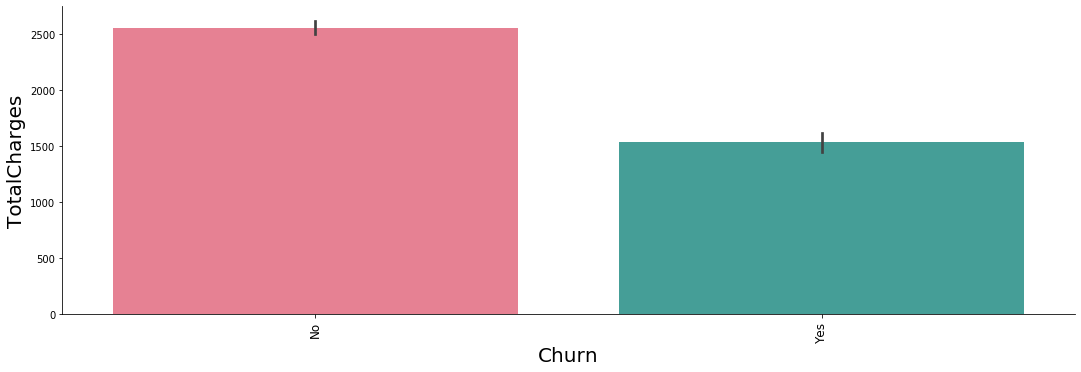

In [18]:
# for loop to plot graphs between Different features and Total charges...
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                y='TotalCharges',
                kind='bar',
                height=5,
                aspect=3,
                palette='husl',
            
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('TotalCharges',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the graph:                                   
                           
1) Senior citizen have more total chrages to company.                 
2) Total Charges are more for those who are Parteners.             
3) Those who have dependents have more Total Charges.             
4) As tenure increases Total Charges also increases.                         
5) Customers having Fiber optic(internet service), Phoneservice, Online Security, Online Backup, Device Protection, TechSupport, Streaming Movies and Streming TV do have more Total Charges.               
6) Customers having 2 year Contract have more Total Charges.              
7) Customers who prefer Paperless billing have moe Total Charges.            
8) Bank Transfer(automatic) and credit card(automatic) have more Total Charges.           
9) The customers who don't decide to leave are have more total charges.                           

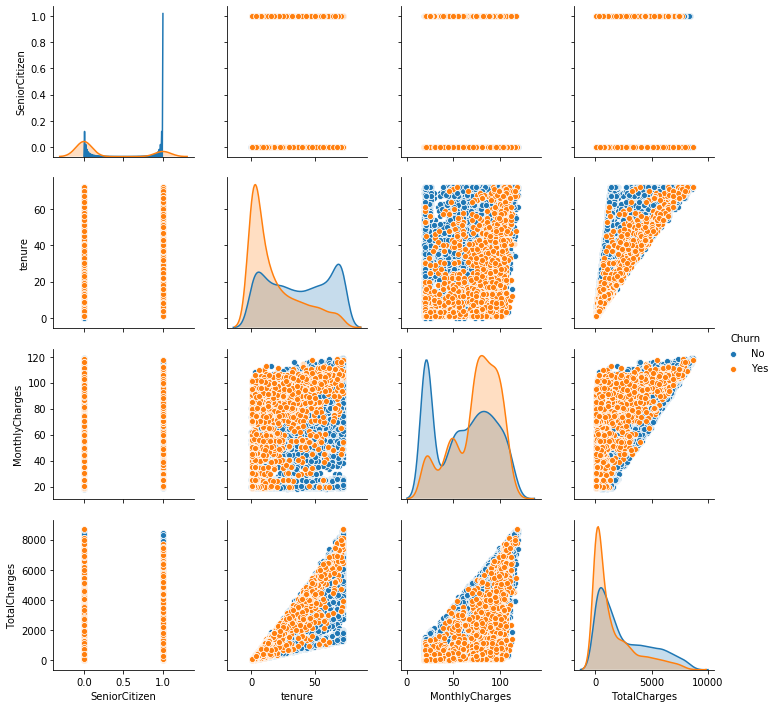

In [19]:
# Plotting the Pairplot....
sns.pairplot(df,hue='Churn')

In [20]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in obj_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [21]:
# filling up NaN values withe mean...
df.fillna(df.mean(), inplace=True)

In [22]:
# Checking Skewness....
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [23]:
# Removing Skewness
for i in df.drop(['Churn'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [24]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(7043, 21)
(6361, 21)


In [25]:
# Checking the skewness again...
df_new.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.433480
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.746749
Churn               1.053055
dtype: float64

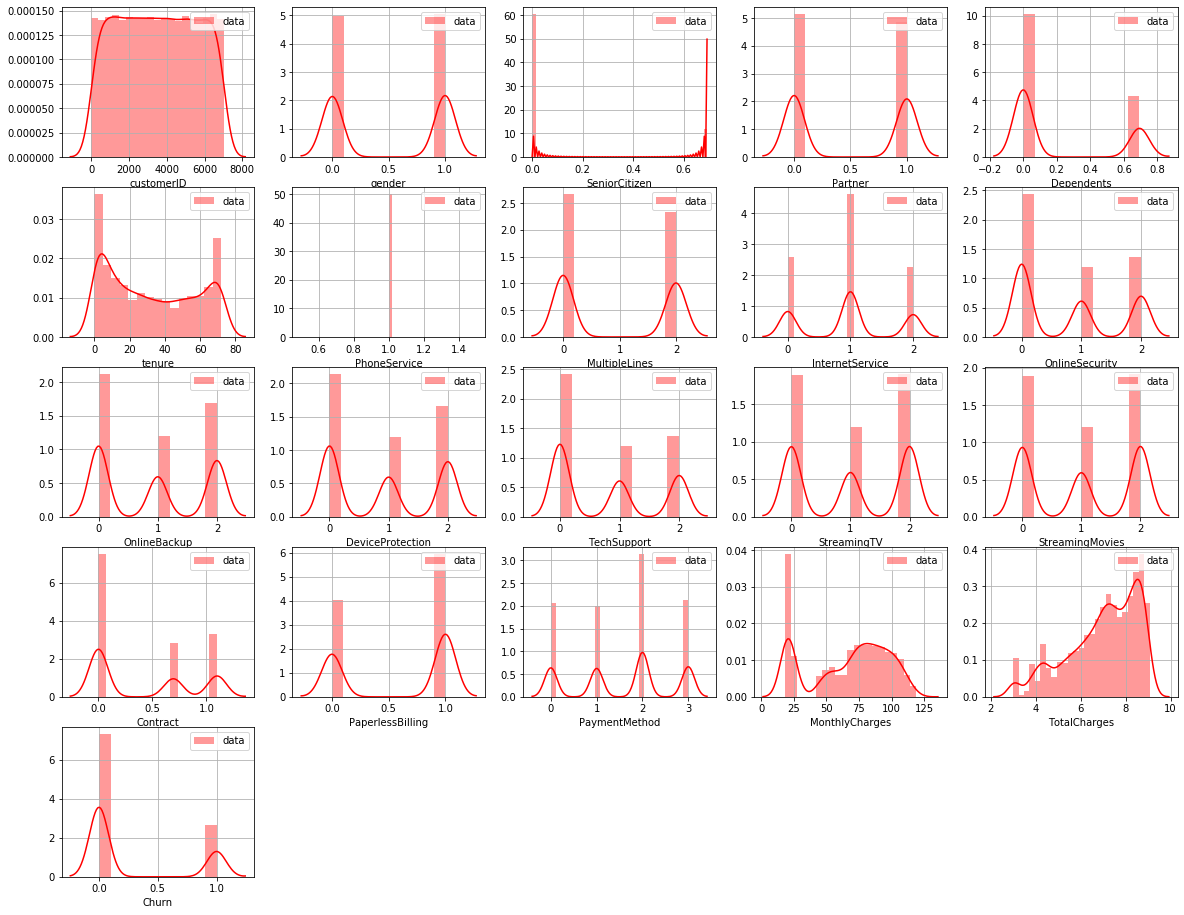

In [26]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [27]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1,0.0038,3.4e-05,-0.026,-0.013,0.0093,nan,0.0044,-0.011,0.012,-0.0048,-0.011,0.0017,-0.015,-0.018,0.017,-0.0063,0.011,-0.0039,0.0085,-0.016
gender,0.0038,1,-0.0067,-0.0031,0.015,0.00071,nan,-0.0072,0.0019,-0.017,-0.0092,-0.003,-0.0095,-0.0056,-0.0027,1.7e-05,-0.019,0.023,-0.013,-0.0091,-0.011
SeniorCitizen,3.4e-05,-0.0067,1,0.015,-0.21,0.019,nan,0.15,-0.041,-0.12,-0.021,-0.024,-0.14,0.029,0.047,-0.14,0.16,-0.043,0.24,0.11,0.15
Partner,-0.026,-0.0031,0.015,1,0.45,0.39,nan,0.15,-0.0068,0.15,0.16,0.17,0.13,0.13,0.13,0.3,-0.0095,-0.15,0.092,0.34,-0.15
Dependents,-0.013,0.015,-0.21,0.45,1,0.16,nan,-0.026,0.052,0.15,0.091,0.084,0.13,0.05,0.025,0.24,-0.11,-0.04,-0.13,0.089,-0.16
tenure,0.0093,0.00071,0.019,0.39,0.16,1,nan,0.36,-0.038,0.33,0.38,0.37,0.32,0.28,0.29,0.68,0.0036,-0.36,0.25,0.83,-0.35
PhoneService,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MultipleLines,0.0044,-0.0072,0.15,0.15,-0.026,0.36,nan,1,-0.11,0.0073,0.13,0.13,0.012,0.19,0.19,0.11,0.17,-0.19,0.46,0.46,0.04
InternetService,-0.011,0.0019,-0.041,-0.0068,0.052,-0.038,nan,-0.11,1,-0.026,0.031,0.05,-0.022,0.1,0.094,0.11,-0.17,0.1,-0.47,-0.26,-0.059
OnlineSecurity,0.012,-0.017,-0.12,0.15,0.15,0.33,nan,0.0073,-0.026,1,0.2,0.17,0.28,0.048,0.064,0.37,-0.16,-0.089,-0.072,0.21,-0.29


(21.0, 0.0)

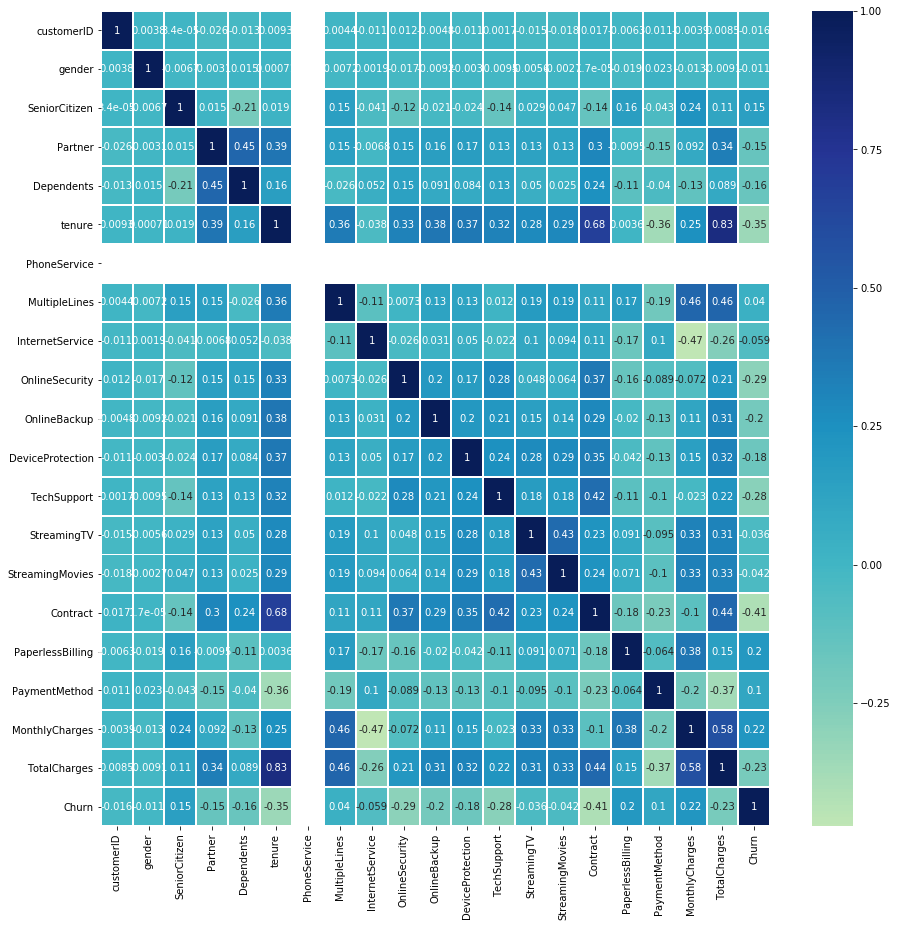

In [28]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [29]:
# This function will create New Features from the given ones and the original ones will be deleted , 
# so that much will learn easily...
df_final=pd.get_dummies(df,columns=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling','PaymentMethod'],drop_first=True)
df_final

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,Partner_1,Dependents_0.6931471805599453,PhoneService_1,...,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_0.6931471805599453,Contract_1.0986122886681098,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,5375,0.000000,1,29.85,3.429137,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,3962,0.000000,34,56.95,7.544597,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,2564,0.000000,2,53.85,4.692723,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,5535,0.000000,45,42.30,7.518471,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6511,0.000000,2,70.70,5.028148,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,0.000000,24,84.80,7.596643,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,1525,0.000000,72,103.20,8.904345,0,0,1,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,3367,0.000000,11,29.60,5.850621,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,5934,0.693147,4,74.40,5.728800,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [30]:
# Dropping the target value and  to fit the remaining data into standard scaler 
x1=df_final.drop(['customerID','Churn'],axis=1)
x1
print(x1.shape)

(7043, 30)


In [31]:
# Setting up the Target value in variable y.
y=df_final['Churn']
y.shape

(7043,)

In [32]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_1,Partner_1,Dependents_0.6931471805599453,PhoneService_1,MultipleLines_1,MultipleLines_2,...,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_0.6931471805599453,Contract_1.0986122886681098,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,-0.439916,-1.277445,-1.160323,-2.274753,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,0.388224,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-1.457129,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,0.371319,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-1.240087,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,0.421902,0.990532,1.034530,1.529024,0.327438,-0.327438,1.170719,...,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,-0.525047,-0.711026,1.835513
7039,-0.439916,1.613701,1.277533,1.268072,-1.009559,1.034530,1.529024,0.327438,-0.327438,1.170719,...,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,1.904590,-0.711026,-0.544807
7040,-0.439916,-0.870241,-1.168632,-0.707892,-1.009559,1.034530,1.529024,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
7041,2.273159,-1.155283,0.320338,-0.786718,0.990532,1.034530,-0.654012,0.327438,-0.327438,1.170719,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513


## Model Training

In [33]:
#........Defining Instances For Differnt Models.......
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
GBC=GradientBoostingClassifier()
RF=RandomForestClassifier()
AD=AdaBoostClassifier()
XG=XGBClassifier()

In [34]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [59]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  78 is: 0.7785139611926172


Learning Score :  0.8340770791075051
Accuracy Score :  0.7785139611926172
Cross Val Score :  0.7761106576284272
roc auc score :  0.7046752393553486


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1552
           1       0.59      0.55      0.57       561

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



Confusion Matrix:
 [[1338  214]
 [ 254  307]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_w

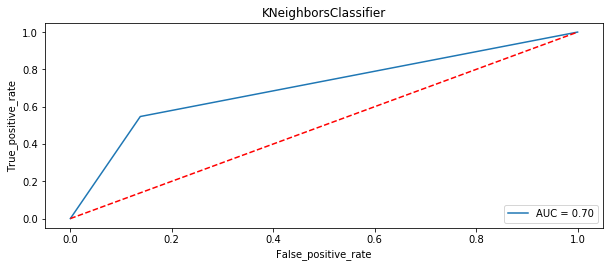

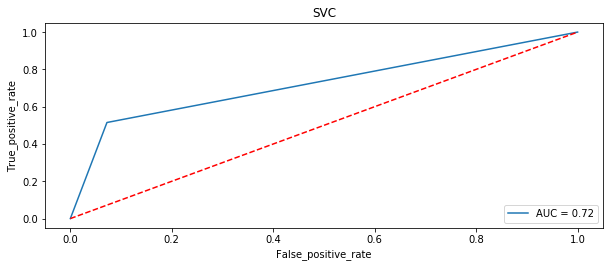

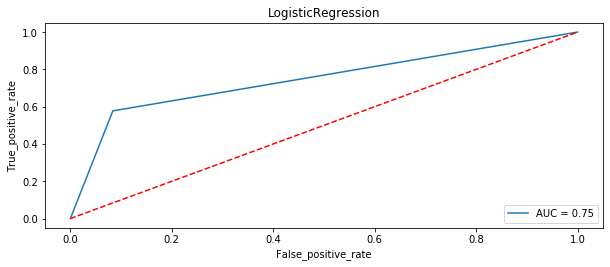

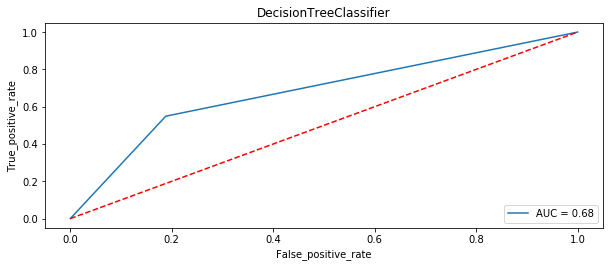

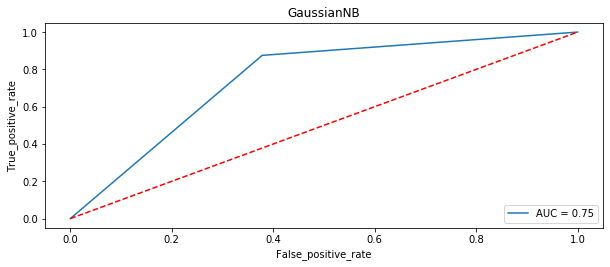

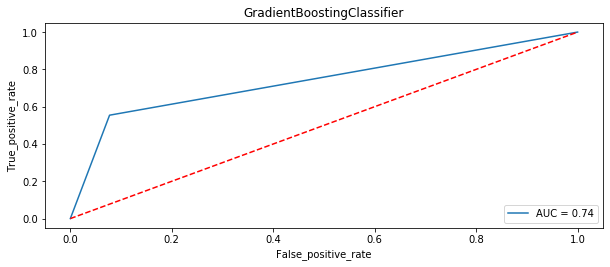

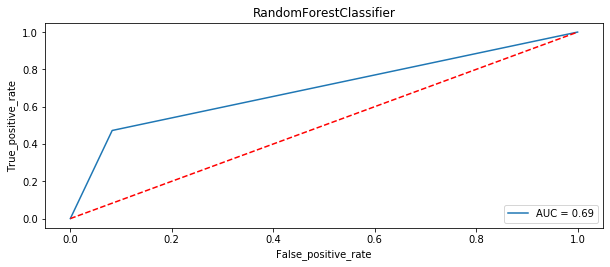

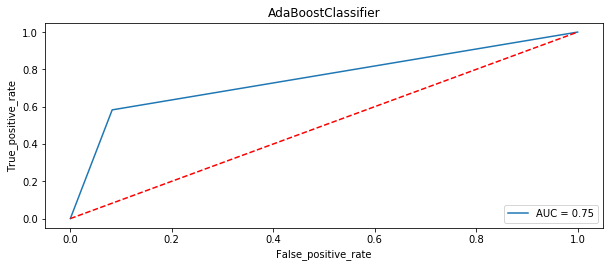

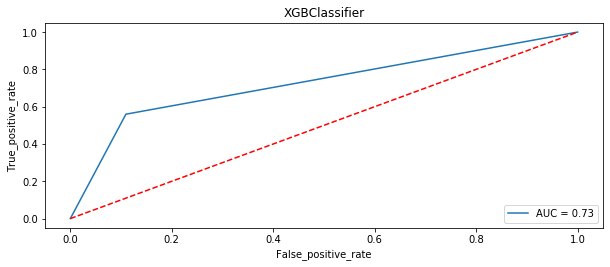

In [60]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [61]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,83.4077,77.8514,77.6111,70.4675
1,SVC,81.5619,81.8268,80.2428,72.1493
2,LogisticRegression,80.284,82.6313,85.0657,74.6889
3,DecisionTreeClassifier,99.7972,74.2073,65.7426,68.0438
4,GaussianNB,66.146,68.9068,82.2623,74.8501
5,GradientBoostingClassifier,82.1704,82.4894,84.7147,73.8524
6,RandomForestClassifier,98.1744,79.9337,79.9744,69.4948
7,AdaBoostClassifier,80.6897,82.868,84.6993,75.0207
8,XGBClassifier,93.9148,80.265,82.4768,72.5089


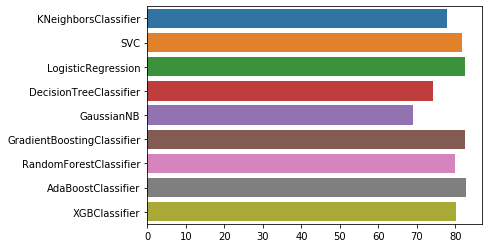

In [62]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

## Hyper Parameter Tuning

##### I have found that my Linear Regression model is performing well in terms of Accuracy score and ROC-AUC score, thus i will use grid search cv to find the best parameters.

In [39]:
#...........Function for GridSearch........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(estimator=mod,
                       param_grid=parameters,
                       scoring='accuracy' ,
                       cv=5,# 5-fold cross-validation
                       verbose=2,n_jobs=-1)
    clf.fit(x_train,y_train)
    print(clf.best_params_)

##### ==> Grid Search for AdaBoostClassifier

In [40]:
#.....Grid Search for AdaBoostClassifier......
adc=AdaBoostClassifier()
parameters={'n_estimators': [50,100,200,500,700],'learning_rate' : [0.01,0.05,0.1,0.3,1]}
grid_cv(adc,parameters)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.0min finished


{'learning_rate': 0.3, 'n_estimators': 50}


In [41]:
#checking r2 score using best parameters which calculated from gridsearchCV
adc=AdaBoostClassifier(n_estimators=50,learning_rate=0.3)
max_acc_score(adc,x,y)

Max Accuracy Score corresponding to Random State  43 is: 0.8277330809275911




43

##### ==> Grid Search for LogisticRegression

In [54]:
#........Grid Search for LogisticRegression....
lr=LogisticRegression()
parameters={"C": np.logspace(-4, 4, 20),"solver": ["liblinear"],'penalty':['l1','l2']}
grid_cv(lr,parameters)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


{'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.3s finished


In [58]:
lg1 = LogisticRegression(C=0.03359818286283781, solver='liblinear',penalty='l1')
max_acc_score(lg1,x,y)

Max Accuracy Score corresponding to Random State  43 is: 0.8239886444286728




43

##### ==> Grid Search for GradientBoostingClassifier

In [43]:
#..............Grid Search for GradientBoostingClassifier...............
gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.6s finished


{'learning_rate': 0.1, 'n_estimators': 100}


In [44]:
# checking r2 score using best parameters which calculated from gridsearchCV
adc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
max_acc_score(adc,x,y)

Max Accuracy Score corresponding to Random State  43 is: 0.8248935163274964




43

##### ==> Grid Search for SVC

In [74]:
#..............Grid Search for SVC()...............
svc=SVC()
parameters={"random_state":np.arange(1,20), 
            'gamma': [1e-3, 1e-4],
            'C': [1, 10, 100, 1000],
            'kernel':['linear','poly','rbf']}
grid_cv(svc,parameters)

Fitting 5 folds for each of 456 candidates, totalling 2280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 2280 out of 2280 | elapsed: 79.0min finished


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 1}


In [75]:
# checking r2 score using best parameters which calculated from gridsearchCV
svc=SVC(random_state=1 ,gamma=0.0001 ,C=1000 ,kernel='rbf')
max_acc_score(svc,x,y)

Max Accuracy Score corresponding to Random State  43 is: 0.8253667770941789




43

# After all this process conclusion is that LogisticRegression  performing well because of high roc_auc score.

In [68]:
#lets make our final model with Logistic Regression
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 43,test_size=0.30,stratify=y)
lg = LogisticRegression(C=0.03359818286283781, solver='liblinear',penalty='l1')
lg.fit(x_train,y_train)
predglg=lg.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predglg))
print('Confusion Matrix:',confusion_matrix(y_test,predglg))
print('Classification Report:','\n',classification_report(y_test,predglg))

Accuracy Score: 0.8239886444286728
Confusion Matrix: [[954  81]
 [167 207]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1035
           1       0.72      0.55      0.63       374

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.82      0.82      0.82      1409



(2.0, 0.0)

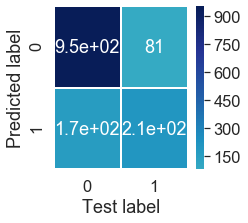

In [67]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, predglg),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("Test label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

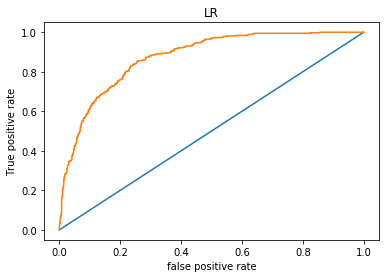

roc_auc_score =  0.8734867860187553


In [65]:
# Make predictions with probabilities
y_probs = lg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='LR')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('LR')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

##### In Logistic regression Roc_auc_score is coming good...

In [70]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predglg
test
# On the lest side values are those fields which are taken by machine for test...

,Churn,Predicted values
6611,0,0
803,0,0
5575,0,0
5413,0,1
6538,1,1
...,...,...
37,0,0
6889,0,1
3373,1,1
5237,0,0


In [76]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predglg)
df1.to_csv('Project_20_Customer_Churn_submission.csv')

In [77]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(gbr,'Project_20_Customer_Churn_submission.pkl')

['Project_20_Customer_Churn_submission.pkl']

In [78]:
# Loading predicted values.
final=joblib.load('Project_20_Customer_Churn_submission.pkl')
final.predict(x_test)

array([0, 1, 0, ..., 1, 0, 0])

## Conclusion:                      

1) Number of customers who are parteners are less.              
2) Males and Females customers are almost equal.                       
3) Proportion of churn in Senior Citizen Customers are more as compared to the young ones.                             
4) Proportion of churn in customers who aren't parteners is more.                          
5) Customers who don't have dependents are more in number and have more proportion of churn.               
6) As Tenure increases number of Customers with churn also decreases                       
7) Customers who uses phone services have more proportion of churn.                     
8) Customers who uses Fiber optic internet service have more proportion of churn.                                  
9) Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup have more        proportion of churn.                      
10) Customers whose Contract are month to month are more in number and have more proportion of churn.                          
11) Customers who prefer Paperless billing are more in number and have more churn.         
12) Customers who use Electronic Check are more in number and have more churn proportion.            
13) Customers who won't leave are more in number.           
14) Senior citizen have more total chrages to company.              
15) Total Charges are more for those who are Parteners.            
16) Those who have dependents have more Total Charges.            
17) As tenure increases Total Charges also increases.     
18) Customers having Fiber optic(internet service), Phoneservice, Online Security, Online Backup, Device Protection,               TechSupport, Streaming Movies and Streming TV do have more Total Charges.                     
19) Customers having 2 year Contract have more Total Charges.                   
20) Customers who prefer Paperless billing have moe Total Charges.          
21) Bank Transfer(automatic) and credit card(automatic) have more Total Charges.          
22) The customers who don't decide to leave are have more total charges.         

## Steps Followed:
     
1) Understanding Data.               
2) EDA Analysis.               
3) Best parameters are found using Gridsearch cv and applied to models.              
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score, mean squared error and root mean square error.                                   
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.   
6) Logistic Regression is used to train the model finally as it's r2_score is best and error is less among the rest of the models.                    
7) Predicted values are saved in Project_20_Customer_Churn_submission.csv file.            
8) Pickle file is named with Project_20_Customer_Churn_submission.pkl file           